# EE404 Project: Wireless Signal Classification - Code Explanation and Improvements

This document explains the Python notebook code for the EE404 Project, which classifies wireless signal modulations using the RadioML 2016.10A dataset. It outlines the code’s functionality, key improvements over the baseline, and a recoded pipeline for improved clarity and efficiency, aligning with *Understanding Deep Learning* (UDL) concepts.

---

##   Code Overview

The notebook implements a deep learning pipeline for classifying **11 modulation types** (e.g., QPSK, QAM16, WBFM) from **220,000 I/Q samples (2×128)** across **SNRs (-20 to 18 dB)**. It addresses:

- **Phase 1**: Exploration, baseline implementation  
- **Phase 2**: Tuning, SNR preprocessing, evaluation, robustness  
- **Bonus Phase**: CNN-based classifier  

###   Setup

- Imports libraries: `torch`, `numpy`, `sklearn`, `matplotlib`
- Sets device: CPU/GPU (`UDL Ch. 2, 6, 8`)

###   Data Loading

- Downloads and extracts the RadioML 2016.10A dataset
- Loads a pickled dictionary of samples (`UDL Ch. 2`)

###   Preprocessing

- **FCN**: Flattens I/Q data, normalizes, adds SNR as input feature (Phase 2B)
- **CNN**: Retains 2×128 structure
- Splits data: 60% train, 20% val, 20% test with stratification (`UDL Ch. 2, 3`)

###   Visualization

- Plots I/Q signals for QPSK, QAM16, and WBFM
- Saves visualizations as PNGs (`Phase 1`, `UDL Ch. 2`)

###   Models

- **FCN**:
  - Input: 257  
  - Layers: Linear(512 → 256 → 128), ReLU, Dropout, Linear(11)  
  - ~297K parameters (`UDL Ch. 6`)

- **CNN**:
  - Input: 2×128  
  - Layers: Conv1D(64 → 128 → 256), MaxPool, Flatten, Linear(512 → 11)  
  - ~2.2M parameters (Bonus Phase, `UDL Ch. 8`)

###   Training

- Loss: CrossEntropyLoss  
- Optimizer: Adam  
- Epochs: 20  
- Plots learning curves (`UDL Ch. 6`)

###   Evaluation

- Computes per-class **F1 scores**
- Generates **confusion matrices**
- Tests **robustness with noise** (σ = 0.05, 0.1, 0.2) (`Phase 2D`, `UDL Ch. 3`)

###   Results

| Model        | Accuracy | Improvement |
|--------------|----------|-------------|
| Baseline FCN | 45.43%   | —           |
| Optimized FCN| 51.08%   | +5.65%      |
| CNN          | 55.03%   | +9.60%      |

---

##   Improvements Over Baseline

1. **SNR Integration (Phase 2B)**  
   Adds normalized SNR to FCN inputs, improving noise awareness  
   **→ +5.65% accuracy**

2. **Hyperparameter Tuning (Phase 2A)**  
   Grid search over:
   - Learning rates: `[0.01, 0.001, 0.0001]`
   - Batch sizes: `[64, 128, 256]`
   - Dropout rates: `[0.3, 0.5, 0.7]`  
   **Best config**: `lr=0.0001, batch=64, dropout=0.3`

3. **CNN Architecture (Bonus Phase)**  
   Captures temporal I/Q structure  
   **→ 55.03% accuracy**

4. **Detailed Evaluation (Phase 2C)**  
   - CNN CPFSK F1: **0.6901**
   - CNN QAM16 F1: **0.2042**

5. **Robustness Testing (Phase 2D)**  
   CNN accuracy under noise:
   - σ = 0.05: **53.88%**
   - σ = 0.2: **53.50%**
   - FCN drops to **43.21%** at σ = 0.2

6. **Visualization (Phase 1)**  
   I/Q plots and learning curves aid understanding

---

## 🔁 Recoded Pipeline

The original pipeline was functional but improved with modular, efficient, and clear design.

###   Configuration

Uses a centralized dictionary for:
```python
config = {
  'lr': [0.01, 0.001, 0.0001],
  'batch_size': 64,
  'dropout': 0.3,
  'epochs': 20,
  'model_type': 'CNN',
  'data_path': './data/',
}


Using device: cuda
--2025-05-10 18:25:30--  https://www.dropbox.com/scl/fi/qbwwz3k9vl9unbugzv9bv/RML2016.10a.tar.bz2?rlkey=8jc298k3yhlf29ag2zk55qgv8&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8f145b648533506d9278b22e96.dl.dropboxusercontent.com/cd/0/inline/CpY4F0Fj4jLZBxrSBengZ-z3cmJqhmuf89Nwg5z3Y6rZfoyDot0tgaOg8KFAZ3MsNFeMKfSs23NWLk1hI5w3d1rrkLHfF60H_fcYWype_XbMQAQTLjAzKWJMOnXg3aR7mFQ/file?dl=1# [following]
--2025-05-10 18:25:31--  https://uc8f145b648533506d9278b22e96.dl.dropboxusercontent.com/cd/0/inline/CpY4F0Fj4jLZBxrSBengZ-z3cmJqhmuf89Nwg5z3Y6rZfoyDot0tgaOg8KFAZ3MsNFeMKfSs23NWLk1hI5w3d1rrkLHfF60H_fcYWype_XbMQAQTLjAzKWJMOnXg3aR7mFQ/file?dl=1
Resolving uc8f145b648533506d9278b22e96.dl.dropboxusercontent.com (uc8f145b648533506d9278b22e96.dl.dropboxusercontent.com)... 162.125.65.15, 262

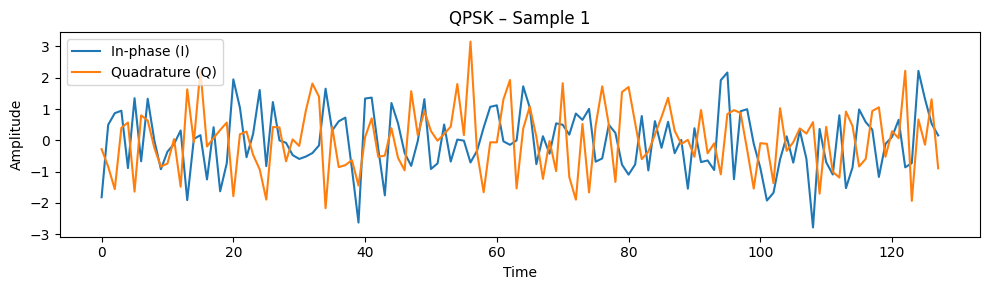

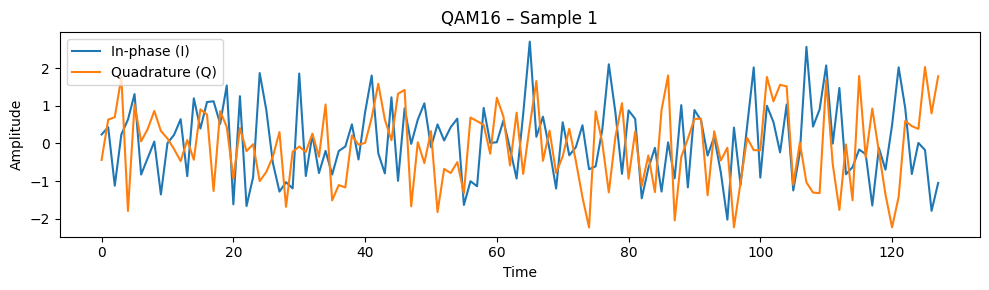

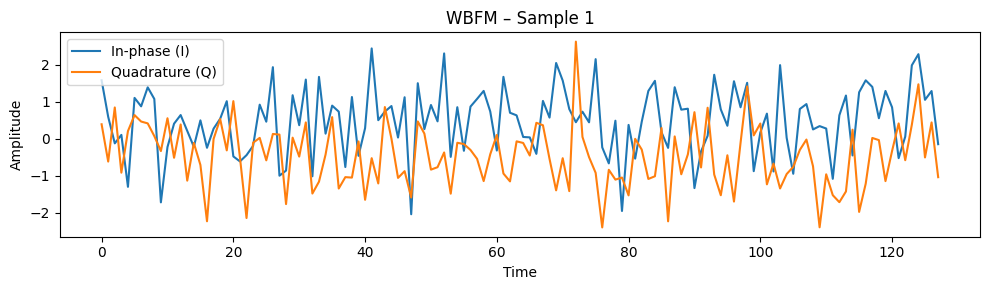


Training Baseline FCN...
Epoch 1/20, Train Loss: 1.9458, Val Loss: 1.7044, Val Acc: 34.26%
Epoch 2/20, Train Loss: 1.7305, Val Loss: 1.6102, Val Acc: 37.56%
Epoch 3/20, Train Loss: 1.6594, Val Loss: 1.5529, Val Acc: 38.38%
Epoch 4/20, Train Loss: 1.6223, Val Loss: 1.5245, Val Acc: 40.76%
Epoch 5/20, Train Loss: 1.5956, Val Loss: 1.5041, Val Acc: 40.71%
Epoch 6/20, Train Loss: 1.5783, Val Loss: 1.4924, Val Acc: 39.71%
Epoch 7/20, Train Loss: 1.5637, Val Loss: 1.4745, Val Acc: 41.20%
Epoch 8/20, Train Loss: 1.5494, Val Loss: 1.4709, Val Acc: 41.52%
Epoch 9/20, Train Loss: 1.5390, Val Loss: 1.4635, Val Acc: 42.12%
Epoch 10/20, Train Loss: 1.5257, Val Loss: 1.4437, Val Acc: 42.15%
Epoch 11/20, Train Loss: 1.5042, Val Loss: 1.3927, Val Acc: 44.02%
Epoch 12/20, Train Loss: 1.4782, Val Loss: 1.3791, Val Acc: 42.54%
Epoch 13/20, Train Loss: 1.4619, Val Loss: 1.3637, Val Acc: 44.34%
Epoch 14/20, Train Loss: 1.4519, Val Loss: 1.3627, Val Acc: 44.05%
Epoch 15/20, Train Loss: 1.4424, Val Loss: 1.

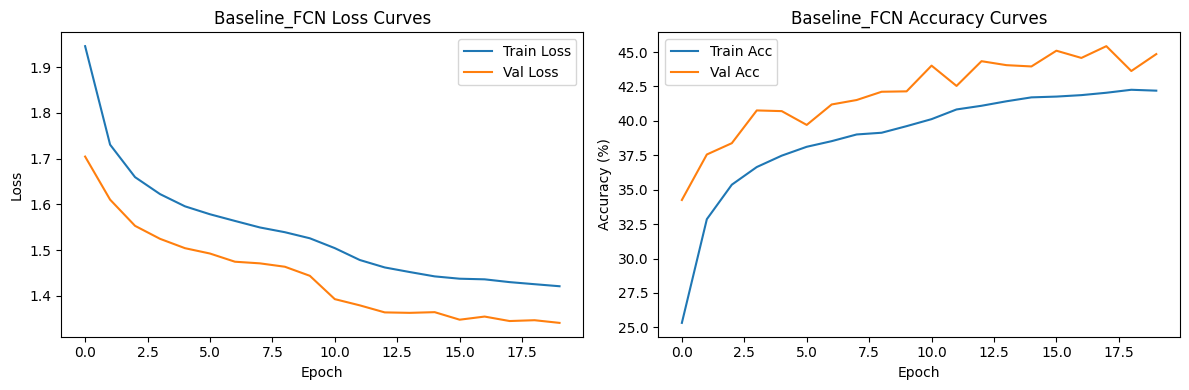

Baseline FCN Validation Accuracy: 45.43%

Testing: LR=0.01, Batch Size=64, Dropout=0.3
Epoch 1/20, Train Loss: 2.1877, Val Loss: 2.1456, Val Acc: 18.18%
Epoch 2/20, Train Loss: 2.2011, Val Loss: 2.1404, Val Acc: 17.46%
Epoch 3/20, Train Loss: 2.1908, Val Loss: 2.1111, Val Acc: 18.15%
Epoch 4/20, Train Loss: 2.2186, Val Loss: 2.2254, Val Acc: 14.12%
Epoch 5/20, Train Loss: 2.3018, Val Loss: 2.3992, Val Acc: 9.08%
Epoch 6/20, Train Loss: 2.3425, Val Loss: 2.3986, Val Acc: 9.09%
Epoch 7/20, Train Loss: 2.4026, Val Loss: 2.3984, Val Acc: 9.09%
Epoch 8/20, Train Loss: 2.4017, Val Loss: 2.3991, Val Acc: 9.09%
Epoch 9/20, Train Loss: 2.4020, Val Loss: 2.3987, Val Acc: 9.09%
Epoch 10/20, Train Loss: 2.4032, Val Loss: 2.3988, Val Acc: 9.09%
Epoch 11/20, Train Loss: 2.4032, Val Loss: 2.3986, Val Acc: 9.09%
Epoch 12/20, Train Loss: 2.4034, Val Loss: 2.3994, Val Acc: 9.09%
Epoch 13/20, Train Loss: 2.4051, Val Loss: 2.3987, Val Acc: 9.09%
Epoch 14/20, Train Loss: 2.4026, Val Loss: 2.3990, Val Acc: 

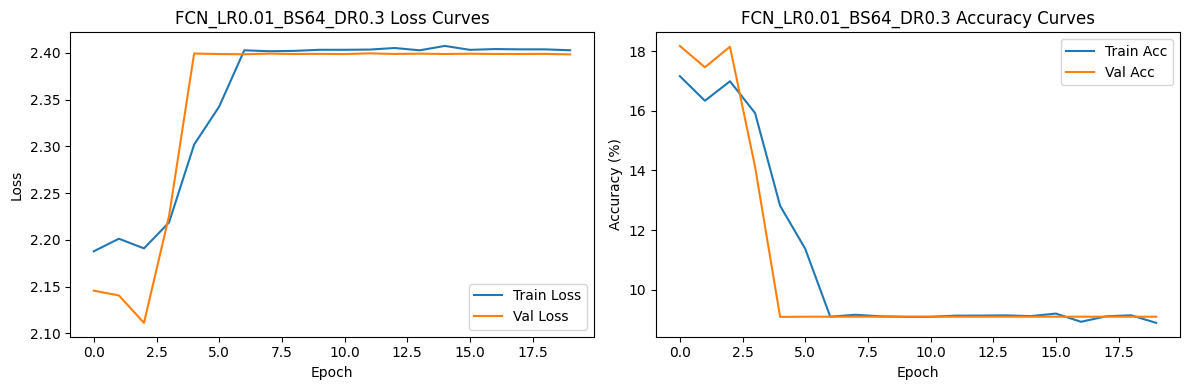


Testing: LR=0.01, Batch Size=64, Dropout=0.5
Epoch 1/20, Train Loss: 2.3683, Val Loss: 2.3994, Val Acc: 9.09%
Epoch 2/20, Train Loss: 2.4021, Val Loss: 2.4038, Val Acc: 11.60%
Epoch 3/20, Train Loss: 2.4042, Val Loss: 2.3890, Val Acc: 9.09%
Epoch 4/20, Train Loss: 2.4022, Val Loss: 2.3990, Val Acc: 9.09%
Epoch 5/20, Train Loss: 2.3997, Val Loss: 2.3986, Val Acc: 9.09%
Epoch 6/20, Train Loss: 2.4016, Val Loss: 2.3443, Val Acc: 14.06%
Epoch 7/20, Train Loss: 2.4003, Val Loss: 2.3986, Val Acc: 9.09%
Epoch 8/20, Train Loss: 2.4043, Val Loss: 2.3987, Val Acc: 9.09%
Epoch 9/20, Train Loss: 2.4010, Val Loss: 2.3754, Val Acc: 14.18%
Epoch 10/20, Train Loss: 2.4014, Val Loss: 2.3996, Val Acc: 9.09%
Epoch 11/20, Train Loss: 2.4031, Val Loss: 2.3993, Val Acc: 9.09%
Epoch 12/20, Train Loss: 2.4053, Val Loss: 2.3991, Val Acc: 9.09%
Epoch 13/20, Train Loss: 2.4068, Val Loss: 2.3984, Val Acc: 9.09%
Epoch 14/20, Train Loss: 2.4065, Val Loss: 2.3987, Val Acc: 9.09%
Epoch 15/20, Train Loss: 2.4030, Val

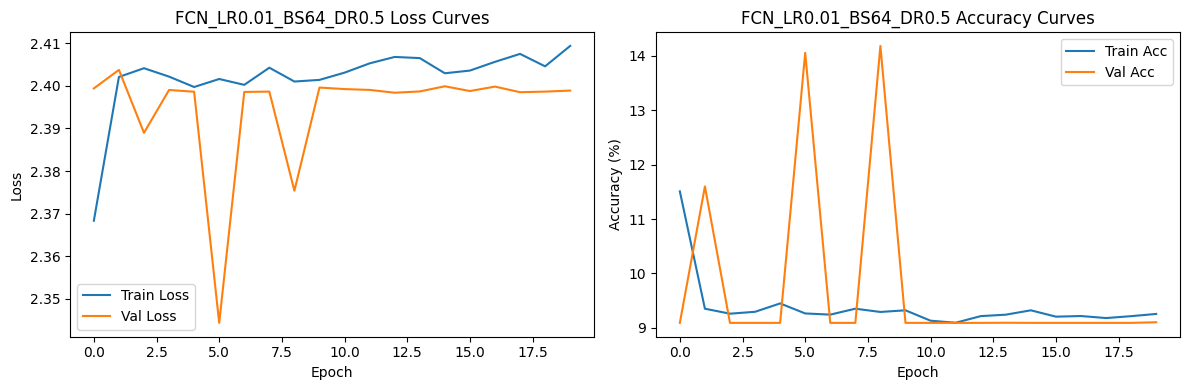


Testing: LR=0.01, Batch Size=64, Dropout=0.7
Epoch 1/20, Train Loss: 2.4328, Val Loss: 2.3988, Val Acc: 9.09%
Epoch 2/20, Train Loss: 2.4211, Val Loss: 2.3990, Val Acc: 9.09%
Epoch 3/20, Train Loss: 2.4224, Val Loss: 2.3983, Val Acc: 9.09%
Epoch 4/20, Train Loss: 2.4266, Val Loss: 2.3983, Val Acc: 9.09%
Epoch 5/20, Train Loss: 2.4331, Val Loss: 2.3981, Val Acc: 9.09%
Epoch 6/20, Train Loss: 2.4097, Val Loss: 2.3987, Val Acc: 9.09%
Epoch 7/20, Train Loss: 2.4229, Val Loss: 2.3988, Val Acc: 9.09%
Epoch 8/20, Train Loss: 2.4125, Val Loss: 2.3982, Val Acc: 9.09%
Epoch 9/20, Train Loss: 2.4324, Val Loss: 2.3986, Val Acc: 9.09%
Epoch 10/20, Train Loss: 2.4193, Val Loss: 2.3986, Val Acc: 9.09%
Epoch 11/20, Train Loss: 2.4445, Val Loss: 2.3993, Val Acc: 9.09%
Epoch 12/20, Train Loss: 2.4121, Val Loss: 2.3993, Val Acc: 9.09%
Epoch 13/20, Train Loss: 2.4190, Val Loss: 2.3984, Val Acc: 9.09%
Epoch 14/20, Train Loss: 2.4196, Val Loss: 2.3988, Val Acc: 9.09%
Epoch 15/20, Train Loss: 2.4377, Val Lo

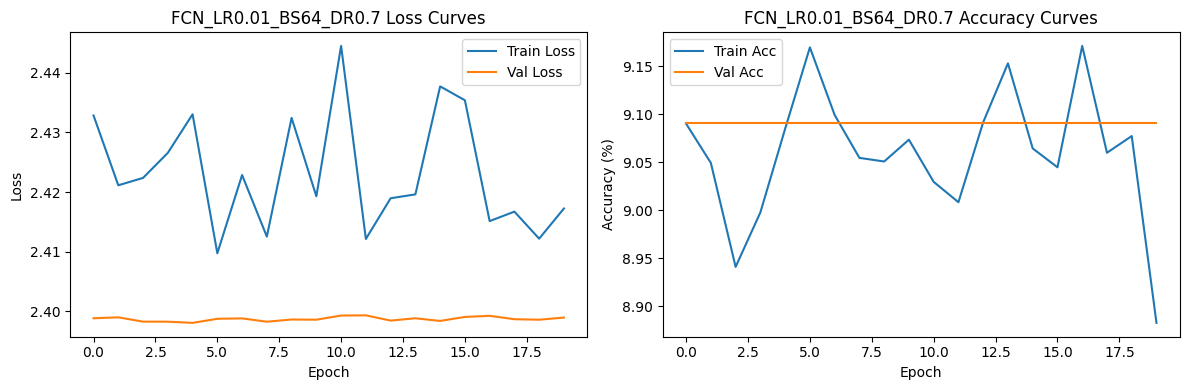


Testing: LR=0.01, Batch Size=128, Dropout=0.3
Epoch 1/20, Train Loss: 2.1045, Val Loss: 2.0227, Val Acc: 23.56%
Epoch 2/20, Train Loss: 2.0720, Val Loss: 2.0600, Val Acc: 20.80%
Epoch 3/20, Train Loss: 2.0698, Val Loss: 1.9888, Val Acc: 24.16%
Epoch 4/20, Train Loss: 2.0717, Val Loss: 2.0055, Val Acc: 23.74%
Epoch 5/20, Train Loss: 2.0908, Val Loss: 2.0695, Val Acc: 21.20%
Epoch 6/20, Train Loss: 2.0946, Val Loss: 2.0260, Val Acc: 24.22%
Epoch 7/20, Train Loss: 2.0850, Val Loss: 2.0140, Val Acc: 22.22%
Epoch 8/20, Train Loss: 2.0963, Val Loss: 1.9669, Val Acc: 23.95%
Epoch 9/20, Train Loss: 2.0881, Val Loss: 2.0314, Val Acc: 22.32%
Epoch 10/20, Train Loss: 2.0860, Val Loss: 1.9801, Val Acc: 23.69%
Epoch 11/20, Train Loss: 2.0835, Val Loss: 1.9986, Val Acc: 24.38%
Epoch 12/20, Train Loss: 2.0910, Val Loss: 2.0159, Val Acc: 22.02%
Epoch 13/20, Train Loss: 2.0903, Val Loss: 1.9646, Val Acc: 23.78%
Epoch 14/20, Train Loss: 2.0776, Val Loss: 1.9691, Val Acc: 24.01%
Epoch 15/20, Train Loss:

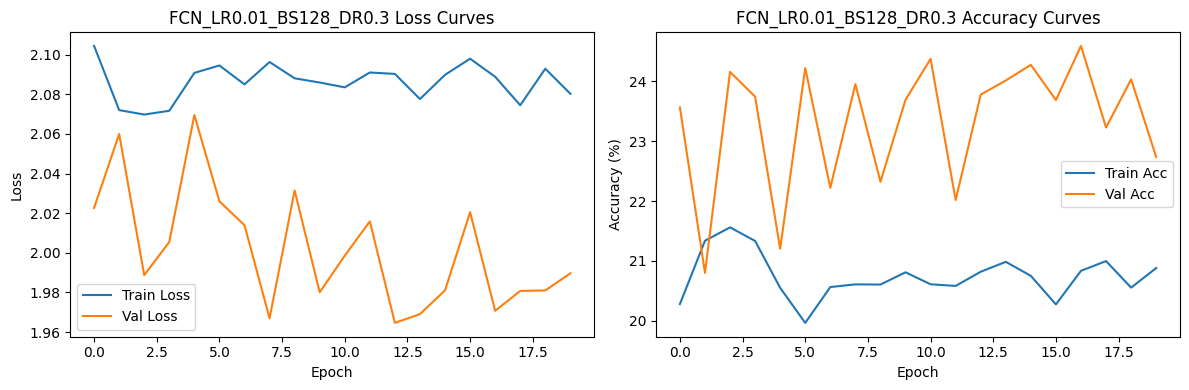


Testing: LR=0.01, Batch Size=128, Dropout=0.5
Epoch 1/20, Train Loss: 2.2380, Val Loss: 2.1467, Val Acc: 18.32%
Epoch 2/20, Train Loss: 2.2805, Val Loss: 2.2468, Val Acc: 13.98%
Epoch 3/20, Train Loss: 2.3296, Val Loss: 2.2374, Val Acc: 13.41%
Epoch 4/20, Train Loss: 2.3060, Val Loss: 2.2290, Val Acc: 13.47%
Epoch 5/20, Train Loss: 2.3068, Val Loss: 2.2216, Val Acc: 14.26%
Epoch 6/20, Train Loss: 2.3102, Val Loss: 2.2155, Val Acc: 14.81%
Epoch 7/20, Train Loss: 2.3482, Val Loss: 2.3983, Val Acc: 9.09%
Epoch 8/20, Train Loss: 2.3834, Val Loss: 2.2339, Val Acc: 13.86%
Epoch 9/20, Train Loss: 2.3509, Val Loss: 2.2914, Val Acc: 13.98%
Epoch 10/20, Train Loss: 2.3489, Val Loss: 2.2252, Val Acc: 14.51%
Epoch 11/20, Train Loss: 2.3388, Val Loss: 2.2655, Val Acc: 13.55%
Epoch 12/20, Train Loss: 2.3511, Val Loss: 2.3021, Val Acc: 13.08%
Epoch 13/20, Train Loss: 2.3410, Val Loss: 2.2885, Val Acc: 13.67%
Epoch 14/20, Train Loss: 2.3417, Val Loss: 2.2469, Val Acc: 14.31%
Epoch 15/20, Train Loss: 

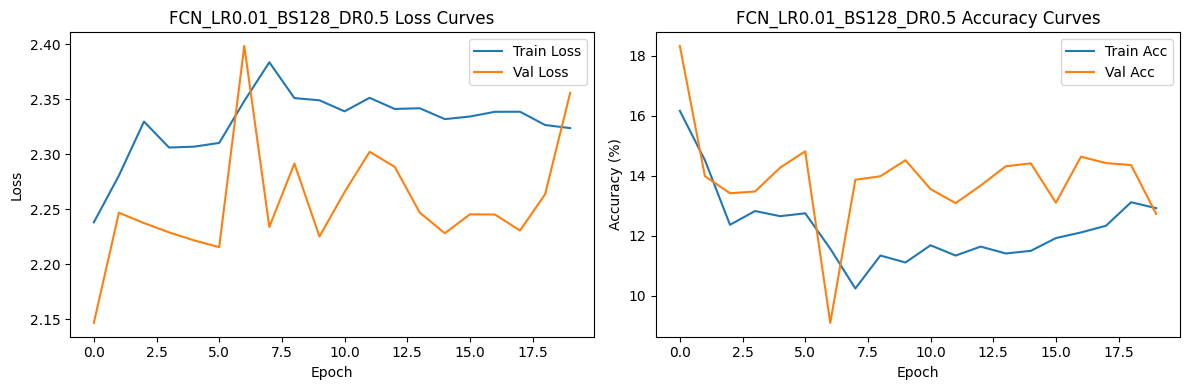


Testing: LR=0.01, Batch Size=128, Dropout=0.7
Epoch 1/20, Train Loss: 2.4146, Val Loss: 2.3982, Val Acc: 9.09%
Epoch 2/20, Train Loss: 2.4196, Val Loss: 2.3982, Val Acc: 9.09%
Epoch 3/20, Train Loss: 2.4203, Val Loss: 2.3981, Val Acc: 9.09%
Epoch 4/20, Train Loss: 2.4092, Val Loss: 2.3982, Val Acc: 9.09%
Epoch 5/20, Train Loss: 2.4066, Val Loss: 2.3988, Val Acc: 9.09%
Epoch 6/20, Train Loss: 2.4083, Val Loss: 2.3984, Val Acc: 9.09%
Epoch 7/20, Train Loss: 2.4104, Val Loss: 2.3981, Val Acc: 9.09%
Epoch 8/20, Train Loss: 2.4082, Val Loss: 2.3985, Val Acc: 9.09%
Epoch 9/20, Train Loss: 2.4043, Val Loss: 2.3983, Val Acc: 9.09%
Epoch 10/20, Train Loss: 2.4114, Val Loss: 2.3989, Val Acc: 9.09%
Epoch 11/20, Train Loss: 2.4295, Val Loss: 2.3994, Val Acc: 9.09%
Epoch 12/20, Train Loss: 2.4077, Val Loss: 2.3985, Val Acc: 9.09%
Epoch 13/20, Train Loss: 2.4133, Val Loss: 2.3986, Val Acc: 9.09%
Epoch 14/20, Train Loss: 2.4095, Val Loss: 2.3985, Val Acc: 9.09%
Epoch 15/20, Train Loss: 2.4044, Val L

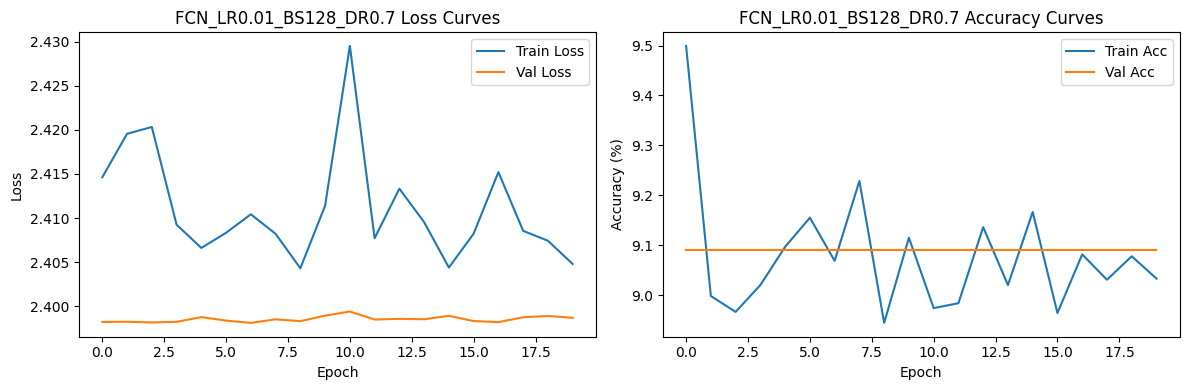


Testing: LR=0.01, Batch Size=256, Dropout=0.3
Epoch 1/20, Train Loss: 2.0329, Val Loss: 1.9574, Val Acc: 25.43%
Epoch 2/20, Train Loss: 1.9802, Val Loss: 1.8874, Val Acc: 27.64%
Epoch 3/20, Train Loss: 1.9624, Val Loss: 1.8716, Val Acc: 26.18%
Epoch 4/20, Train Loss: 1.9513, Val Loss: 1.8662, Val Acc: 27.08%
Epoch 5/20, Train Loss: 1.9441, Val Loss: 1.8785, Val Acc: 26.31%
Epoch 6/20, Train Loss: 1.9311, Val Loss: 1.8471, Val Acc: 27.12%
Epoch 7/20, Train Loss: 1.9332, Val Loss: 1.8873, Val Acc: 25.38%
Epoch 8/20, Train Loss: 1.9256, Val Loss: 1.8370, Val Acc: 27.39%
Epoch 9/20, Train Loss: 1.9247, Val Loss: 1.8319, Val Acc: 27.77%
Epoch 10/20, Train Loss: 1.9242, Val Loss: 1.8461, Val Acc: 26.22%
Epoch 11/20, Train Loss: 1.9261, Val Loss: 1.8511, Val Acc: 25.78%
Epoch 12/20, Train Loss: 1.9203, Val Loss: 1.8336, Val Acc: 27.26%
Epoch 13/20, Train Loss: 1.9298, Val Loss: 1.8405, Val Acc: 26.34%
Epoch 14/20, Train Loss: 1.9196, Val Loss: 1.8273, Val Acc: 27.28%
Epoch 15/20, Train Loss:

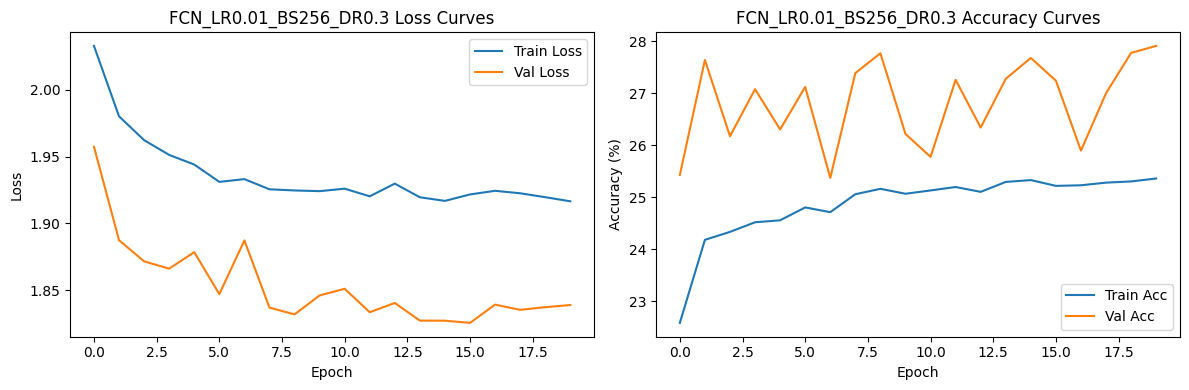


Testing: LR=0.01, Batch Size=256, Dropout=0.5
Epoch 1/20, Train Loss: 2.1581, Val Loss: 2.0559, Val Acc: 21.34%
Epoch 2/20, Train Loss: 2.1252, Val Loss: 2.0321, Val Acc: 21.08%
Epoch 3/20, Train Loss: 2.1450, Val Loss: 2.0845, Val Acc: 19.89%
Epoch 4/20, Train Loss: 2.1642, Val Loss: 2.1153, Val Acc: 18.62%
Epoch 5/20, Train Loss: 2.1617, Val Loss: 2.0977, Val Acc: 19.83%
Epoch 6/20, Train Loss: 2.1757, Val Loss: 2.1006, Val Acc: 19.19%
Epoch 7/20, Train Loss: 2.1846, Val Loss: 2.0810, Val Acc: 20.62%
Epoch 8/20, Train Loss: 2.1844, Val Loss: 2.1471, Val Acc: 18.58%
Epoch 9/20, Train Loss: 2.1916, Val Loss: 2.1210, Val Acc: 16.92%
Epoch 10/20, Train Loss: 2.1850, Val Loss: 2.1287, Val Acc: 19.72%
Epoch 11/20, Train Loss: 2.1740, Val Loss: 2.1174, Val Acc: 19.85%
Epoch 12/20, Train Loss: 2.1973, Val Loss: 2.1305, Val Acc: 17.78%
Epoch 13/20, Train Loss: 2.1908, Val Loss: 2.1136, Val Acc: 19.65%
Epoch 14/20, Train Loss: 2.2089, Val Loss: 2.1345, Val Acc: 18.71%
Epoch 15/20, Train Loss:

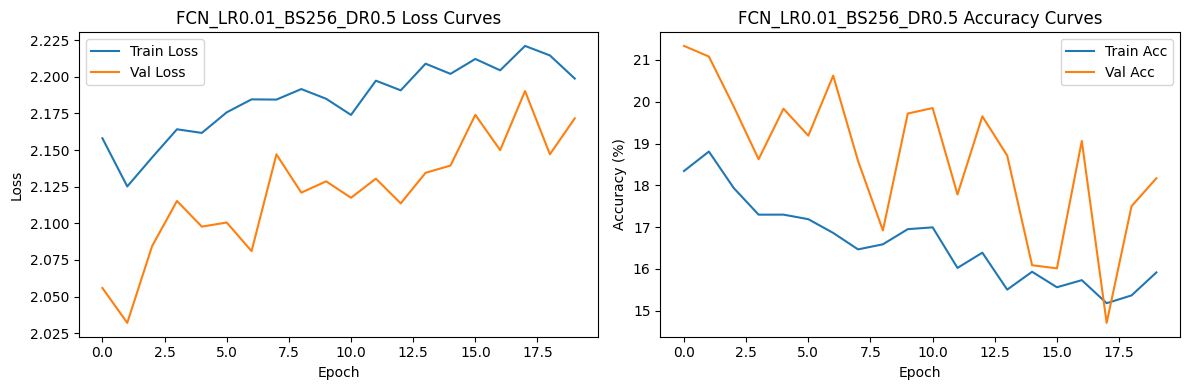


Testing: LR=0.01, Batch Size=256, Dropout=0.7
Epoch 1/20, Train Loss: 2.3568, Val Loss: 2.4026, Val Acc: 9.09%
Epoch 2/20, Train Loss: 2.4164, Val Loss: 2.3984, Val Acc: 9.09%
Epoch 3/20, Train Loss: 2.4121, Val Loss: 2.3987, Val Acc: 9.09%
Epoch 4/20, Train Loss: 2.4046, Val Loss: 2.3981, Val Acc: 9.09%
Epoch 5/20, Train Loss: 2.4036, Val Loss: 2.3983, Val Acc: 9.09%
Epoch 6/20, Train Loss: 2.4044, Val Loss: 2.3984, Val Acc: 9.09%
Epoch 7/20, Train Loss: 2.4080, Val Loss: 2.3988, Val Acc: 9.09%
Epoch 8/20, Train Loss: 2.4043, Val Loss: 2.3981, Val Acc: 9.09%
Epoch 9/20, Train Loss: 2.4051, Val Loss: 2.3984, Val Acc: 9.09%
Epoch 10/20, Train Loss: 2.4017, Val Loss: 2.3980, Val Acc: 9.09%
Epoch 11/20, Train Loss: 2.4074, Val Loss: 2.3985, Val Acc: 9.09%
Epoch 12/20, Train Loss: 2.4032, Val Loss: 2.3981, Val Acc: 9.09%
Epoch 13/20, Train Loss: 2.4066, Val Loss: 2.3985, Val Acc: 9.09%
Epoch 14/20, Train Loss: 2.4019, Val Loss: 2.3984, Val Acc: 9.09%
Epoch 15/20, Train Loss: 2.4016, Val L

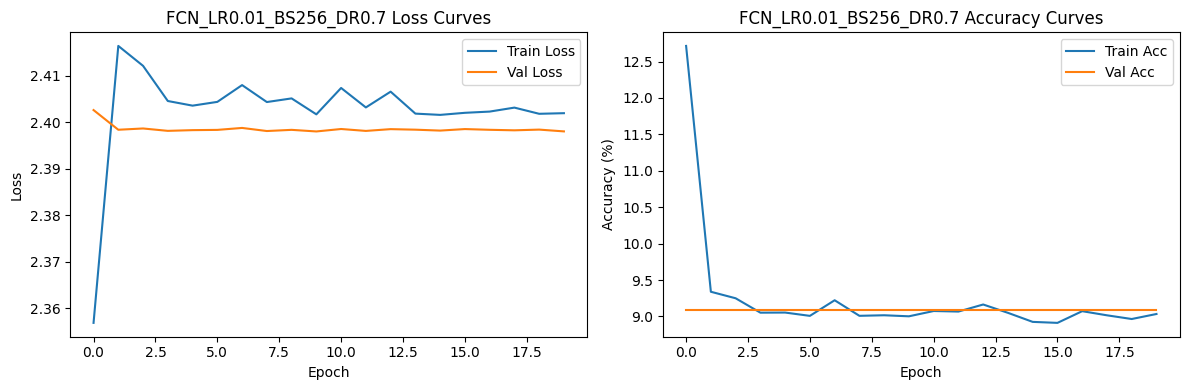


Testing: LR=0.001, Batch Size=64, Dropout=0.3
Epoch 1/20, Train Loss: 1.7897, Val Loss: 1.5735, Val Acc: 37.65%
Epoch 2/20, Train Loss: 1.5862, Val Loss: 1.4986, Val Acc: 39.70%
Epoch 3/20, Train Loss: 1.5224, Val Loss: 1.4195, Val Acc: 42.44%
Epoch 4/20, Train Loss: 1.4447, Val Loss: 1.3554, Val Acc: 43.82%
Epoch 5/20, Train Loss: 1.4078, Val Loss: 1.3444, Val Acc: 44.81%
Epoch 6/20, Train Loss: 1.3871, Val Loss: 1.3490, Val Acc: 43.76%
Epoch 7/20, Train Loss: 1.3717, Val Loss: 1.3295, Val Acc: 44.35%
Epoch 8/20, Train Loss: 1.3617, Val Loss: 1.3301, Val Acc: 44.83%
Epoch 9/20, Train Loss: 1.3526, Val Loss: 1.3289, Val Acc: 45.49%
Epoch 10/20, Train Loss: 1.3423, Val Loss: 1.3168, Val Acc: 45.98%
Epoch 11/20, Train Loss: 1.3316, Val Loss: 1.3237, Val Acc: 45.60%
Epoch 12/20, Train Loss: 1.3269, Val Loss: 1.3199, Val Acc: 45.65%
Epoch 13/20, Train Loss: 1.3217, Val Loss: 1.3204, Val Acc: 45.68%
Epoch 14/20, Train Loss: 1.3147, Val Loss: 1.3098, Val Acc: 46.17%
Epoch 15/20, Train Loss:

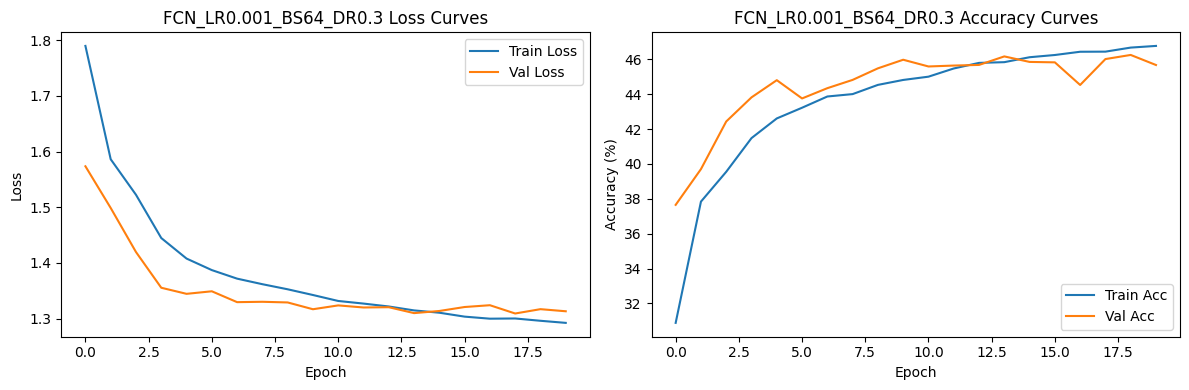


Testing: LR=0.001, Batch Size=64, Dropout=0.5
Epoch 1/20, Train Loss: 1.9282, Val Loss: 1.6917, Val Acc: 34.40%
Epoch 2/20, Train Loss: 1.7333, Val Loss: 1.6192, Val Acc: 37.45%
Epoch 3/20, Train Loss: 1.6797, Val Loss: 1.5738, Val Acc: 38.66%
Epoch 4/20, Train Loss: 1.6519, Val Loss: 1.5508, Val Acc: 39.29%
Epoch 5/20, Train Loss: 1.6307, Val Loss: 1.5375, Val Acc: 39.55%
Epoch 6/20, Train Loss: 1.6095, Val Loss: 1.5242, Val Acc: 39.93%
Epoch 7/20, Train Loss: 1.6018, Val Loss: 1.5116, Val Acc: 40.29%
Epoch 8/20, Train Loss: 1.5924, Val Loss: 1.5094, Val Acc: 40.29%
Epoch 9/20, Train Loss: 1.5860, Val Loss: 1.5052, Val Acc: 40.49%
Epoch 10/20, Train Loss: 1.5793, Val Loss: 1.4919, Val Acc: 41.02%
Epoch 11/20, Train Loss: 1.5702, Val Loss: 1.4892, Val Acc: 39.74%
Epoch 12/20, Train Loss: 1.5574, Val Loss: 1.4565, Val Acc: 41.67%
Epoch 13/20, Train Loss: 1.5300, Val Loss: 1.4148, Val Acc: 42.58%
Epoch 14/20, Train Loss: 1.5077, Val Loss: 1.4036, Val Acc: 43.16%
Epoch 15/20, Train Loss:

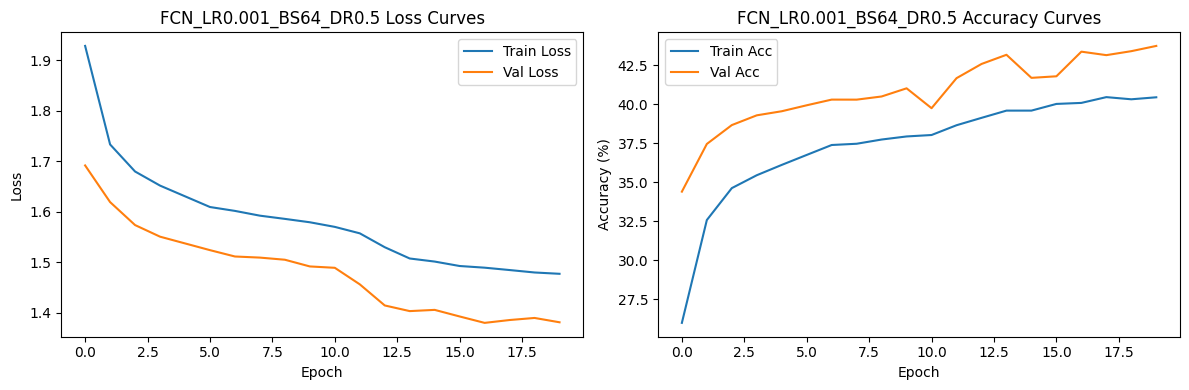


Testing: LR=0.001, Batch Size=64, Dropout=0.7
Epoch 1/20, Train Loss: 2.1096, Val Loss: 1.9611, Val Acc: 24.72%
Epoch 2/20, Train Loss: 1.9902, Val Loss: 1.9187, Val Acc: 25.93%
Epoch 3/20, Train Loss: 1.9662, Val Loss: 1.9076, Val Acc: 26.04%
Epoch 4/20, Train Loss: 1.9397, Val Loss: 1.8636, Val Acc: 28.33%
Epoch 5/20, Train Loss: 1.9185, Val Loss: 1.8513, Val Acc: 27.22%
Epoch 6/20, Train Loss: 1.9022, Val Loss: 1.8398, Val Acc: 25.94%
Epoch 7/20, Train Loss: 1.8942, Val Loss: 1.8346, Val Acc: 28.12%
Epoch 8/20, Train Loss: 1.8863, Val Loss: 1.8238, Val Acc: 28.78%
Epoch 9/20, Train Loss: 1.8773, Val Loss: 1.8141, Val Acc: 28.77%
Epoch 10/20, Train Loss: 1.8723, Val Loss: 1.7964, Val Acc: 30.45%
Epoch 11/20, Train Loss: 1.8640, Val Loss: 1.7949, Val Acc: 31.98%
Epoch 12/20, Train Loss: 1.8493, Val Loss: 1.7660, Val Acc: 32.02%
Epoch 13/20, Train Loss: 1.8327, Val Loss: 1.7368, Val Acc: 32.40%
Epoch 14/20, Train Loss: 1.8220, Val Loss: 1.7316, Val Acc: 32.27%
Epoch 15/20, Train Loss:

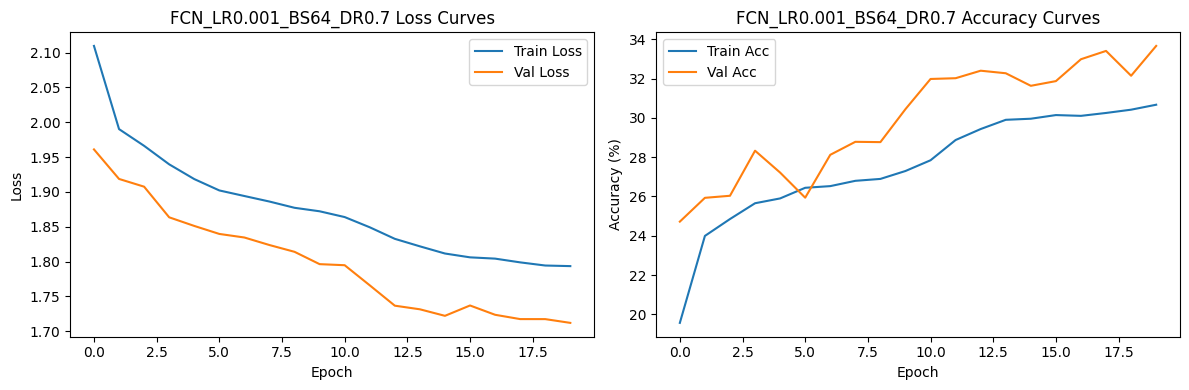


Testing: LR=0.001, Batch Size=128, Dropout=0.3
Epoch 1/20, Train Loss: 1.8035, Val Loss: 1.5807, Val Acc: 36.14%
Epoch 2/20, Train Loss: 1.5777, Val Loss: 1.4814, Val Acc: 41.47%
Epoch 3/20, Train Loss: 1.5092, Val Loss: 1.4124, Val Acc: 42.42%
Epoch 4/20, Train Loss: 1.4270, Val Loss: 1.3505, Val Acc: 44.41%
Epoch 5/20, Train Loss: 1.3826, Val Loss: 1.3250, Val Acc: 45.78%
Epoch 6/20, Train Loss: 1.3572, Val Loss: 1.3219, Val Acc: 45.72%
Epoch 7/20, Train Loss: 1.3399, Val Loss: 1.3071, Val Acc: 45.86%
Epoch 8/20, Train Loss: 1.3247, Val Loss: 1.3022, Val Acc: 46.39%
Epoch 9/20, Train Loss: 1.3126, Val Loss: 1.3038, Val Acc: 45.19%
Epoch 10/20, Train Loss: 1.2995, Val Loss: 1.2971, Val Acc: 46.61%
Epoch 11/20, Train Loss: 1.2911, Val Loss: 1.2941, Val Acc: 47.03%
Epoch 12/20, Train Loss: 1.2827, Val Loss: 1.2911, Val Acc: 47.34%
Epoch 13/20, Train Loss: 1.2735, Val Loss: 1.3001, Val Acc: 46.51%
Epoch 14/20, Train Loss: 1.2672, Val Loss: 1.2947, Val Acc: 47.22%
Epoch 15/20, Train Loss

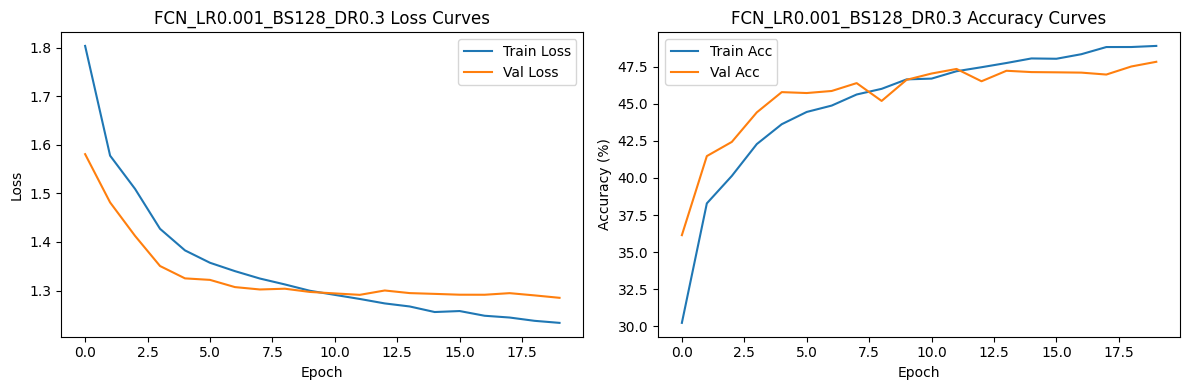


Testing: LR=0.001, Batch Size=128, Dropout=0.5
Epoch 1/20, Train Loss: 1.9424, Val Loss: 1.6913, Val Acc: 34.48%
Epoch 2/20, Train Loss: 1.7283, Val Loss: 1.6081, Val Acc: 37.40%
Epoch 3/20, Train Loss: 1.6638, Val Loss: 1.5643, Val Acc: 39.48%
Epoch 4/20, Train Loss: 1.6245, Val Loss: 1.5176, Val Acc: 40.66%
Epoch 5/20, Train Loss: 1.5990, Val Loss: 1.5123, Val Acc: 40.40%
Epoch 6/20, Train Loss: 1.5791, Val Loss: 1.4900, Val Acc: 40.66%
Epoch 7/20, Train Loss: 1.5627, Val Loss: 1.4871, Val Acc: 41.62%
Epoch 8/20, Train Loss: 1.5521, Val Loss: 1.4708, Val Acc: 39.90%
Epoch 9/20, Train Loss: 1.5420, Val Loss: 1.4652, Val Acc: 41.47%
Epoch 10/20, Train Loss: 1.5260, Val Loss: 1.4284, Val Acc: 40.83%
Epoch 11/20, Train Loss: 1.4983, Val Loss: 1.3896, Val Acc: 43.37%
Epoch 12/20, Train Loss: 1.4761, Val Loss: 1.3780, Val Acc: 43.77%
Epoch 13/20, Train Loss: 1.4600, Val Loss: 1.3677, Val Acc: 44.16%
Epoch 14/20, Train Loss: 1.4501, Val Loss: 1.3747, Val Acc: 43.40%
Epoch 15/20, Train Loss

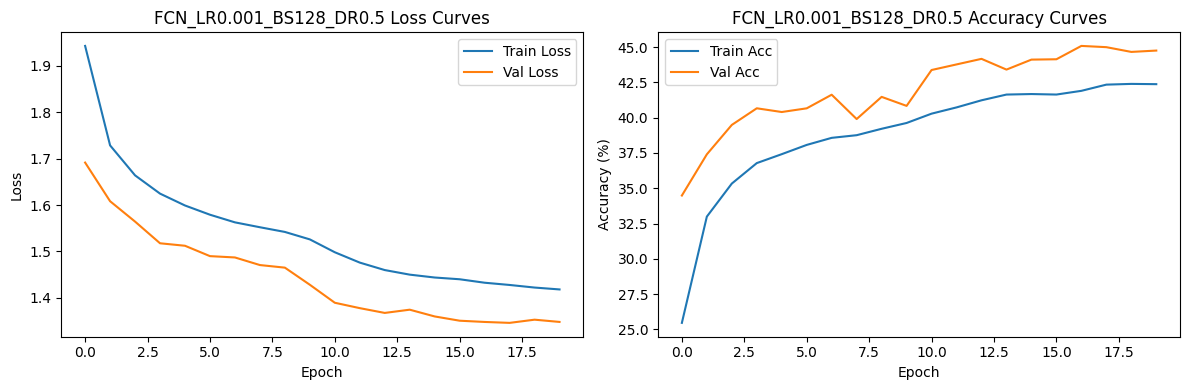


Testing: LR=0.001, Batch Size=128, Dropout=0.7
Epoch 1/20, Train Loss: 2.1227, Val Loss: 1.9491, Val Acc: 25.40%
Epoch 2/20, Train Loss: 1.9682, Val Loss: 1.8781, Val Acc: 27.57%
Epoch 3/20, Train Loss: 1.9179, Val Loss: 1.8414, Val Acc: 27.54%
Epoch 4/20, Train Loss: 1.8888, Val Loss: 1.8058, Val Acc: 29.34%
Epoch 5/20, Train Loss: 1.8702, Val Loss: 1.7955, Val Acc: 30.18%
Epoch 6/20, Train Loss: 1.8522, Val Loss: 1.7692, Val Acc: 32.48%
Epoch 7/20, Train Loss: 1.8329, Val Loss: 1.7399, Val Acc: 32.58%
Epoch 8/20, Train Loss: 1.8068, Val Loss: 1.7055, Val Acc: 33.77%
Epoch 9/20, Train Loss: 1.7935, Val Loss: 1.6948, Val Acc: 32.54%
Epoch 10/20, Train Loss: 1.7784, Val Loss: 1.6838, Val Acc: 34.05%
Epoch 11/20, Train Loss: 1.7657, Val Loss: 1.6816, Val Acc: 35.16%
Epoch 12/20, Train Loss: 1.7604, Val Loss: 1.6549, Val Acc: 36.06%
Epoch 13/20, Train Loss: 1.7514, Val Loss: 1.6529, Val Acc: 35.69%
Epoch 14/20, Train Loss: 1.7434, Val Loss: 1.6411, Val Acc: 36.34%
Epoch 15/20, Train Loss

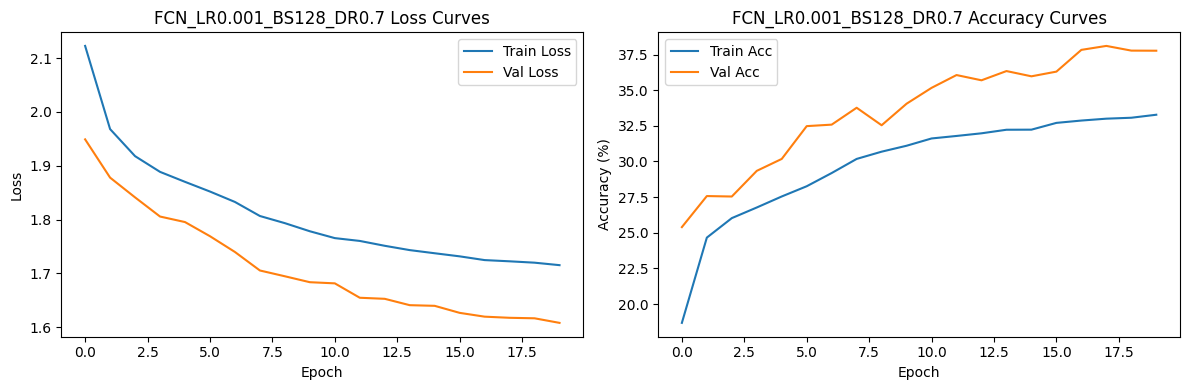


Testing: LR=0.001, Batch Size=256, Dropout=0.3
Epoch 1/20, Train Loss: 1.8464, Val Loss: 1.5934, Val Acc: 37.87%
Epoch 2/20, Train Loss: 1.5934, Val Loss: 1.4932, Val Acc: 41.22%
Epoch 3/20, Train Loss: 1.5222, Val Loss: 1.4433, Val Acc: 41.09%
Epoch 4/20, Train Loss: 1.4517, Val Loss: 1.3670, Val Acc: 42.38%
Epoch 5/20, Train Loss: 1.3858, Val Loss: 1.3278, Val Acc: 45.54%
Epoch 6/20, Train Loss: 1.3525, Val Loss: 1.3156, Val Acc: 46.42%
Epoch 7/20, Train Loss: 1.3298, Val Loss: 1.3071, Val Acc: 46.07%
Epoch 8/20, Train Loss: 1.3093, Val Loss: 1.2933, Val Acc: 47.07%
Epoch 9/20, Train Loss: 1.2939, Val Loss: 1.2962, Val Acc: 46.81%
Epoch 10/20, Train Loss: 1.2809, Val Loss: 1.2900, Val Acc: 47.39%
Epoch 11/20, Train Loss: 1.2698, Val Loss: 1.2824, Val Acc: 47.19%
Epoch 12/20, Train Loss: 1.2579, Val Loss: 1.2742, Val Acc: 47.88%
Epoch 13/20, Train Loss: 1.2496, Val Loss: 1.2786, Val Acc: 47.58%
Epoch 14/20, Train Loss: 1.2427, Val Loss: 1.2787, Val Acc: 47.78%
Epoch 15/20, Train Loss

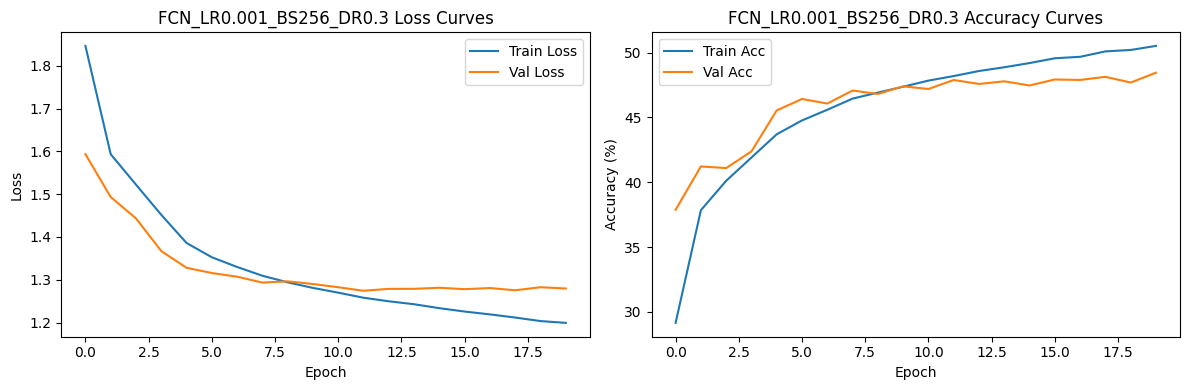


Testing: LR=0.001, Batch Size=256, Dropout=0.5
Epoch 1/20, Train Loss: 1.9806, Val Loss: 1.7104, Val Acc: 34.18%
Epoch 2/20, Train Loss: 1.7380, Val Loss: 1.6243, Val Acc: 36.29%
Epoch 3/20, Train Loss: 1.6669, Val Loss: 1.5555, Val Acc: 39.84%
Epoch 4/20, Train Loss: 1.6181, Val Loss: 1.5266, Val Acc: 40.43%
Epoch 5/20, Train Loss: 1.5877, Val Loss: 1.5112, Val Acc: 41.03%
Epoch 6/20, Train Loss: 1.5654, Val Loss: 1.4882, Val Acc: 40.04%
Epoch 7/20, Train Loss: 1.5492, Val Loss: 1.4734, Val Acc: 41.63%
Epoch 8/20, Train Loss: 1.5336, Val Loss: 1.4529, Val Acc: 42.15%
Epoch 9/20, Train Loss: 1.5176, Val Loss: 1.4471, Val Acc: 42.00%
Epoch 10/20, Train Loss: 1.5109, Val Loss: 1.4400, Val Acc: 42.27%
Epoch 11/20, Train Loss: 1.4946, Val Loss: 1.4217, Val Acc: 42.90%
Epoch 12/20, Train Loss: 1.4746, Val Loss: 1.3757, Val Acc: 44.17%
Epoch 13/20, Train Loss: 1.4499, Val Loss: 1.3529, Val Acc: 44.94%
Epoch 14/20, Train Loss: 1.4292, Val Loss: 1.3424, Val Acc: 44.91%
Epoch 15/20, Train Loss

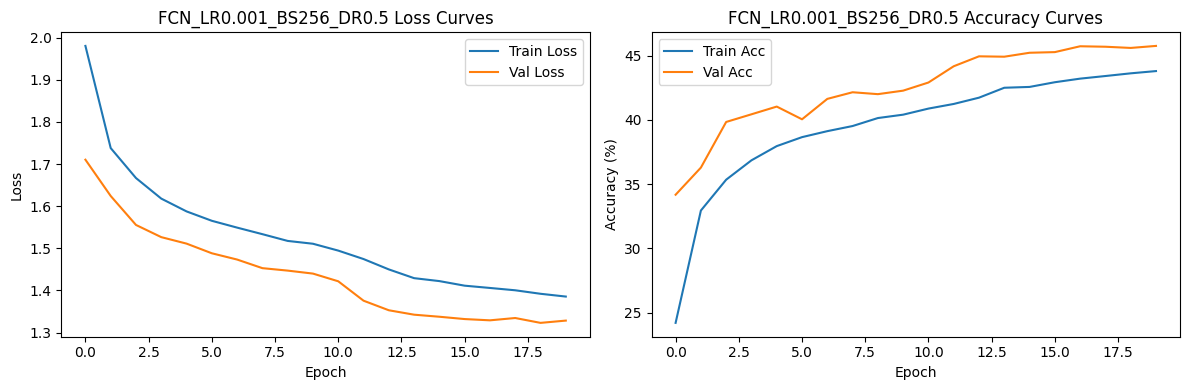


Testing: LR=0.001, Batch Size=256, Dropout=0.7
Epoch 1/20, Train Loss: 2.1527, Val Loss: 1.9587, Val Acc: 25.78%
Epoch 2/20, Train Loss: 1.9726, Val Loss: 1.8762, Val Acc: 28.39%
Epoch 3/20, Train Loss: 1.9072, Val Loss: 1.8173, Val Acc: 28.51%
Epoch 4/20, Train Loss: 1.8707, Val Loss: 1.7873, Val Acc: 29.12%
Epoch 5/20, Train Loss: 1.8457, Val Loss: 1.7705, Val Acc: 32.05%
Epoch 6/20, Train Loss: 1.8252, Val Loss: 1.7408, Val Acc: 32.40%
Epoch 7/20, Train Loss: 1.8010, Val Loss: 1.7128, Val Acc: 34.42%
Epoch 8/20, Train Loss: 1.7787, Val Loss: 1.6707, Val Acc: 35.65%
Epoch 9/20, Train Loss: 1.7591, Val Loss: 1.6584, Val Acc: 35.85%
Epoch 10/20, Train Loss: 1.7454, Val Loss: 1.6529, Val Acc: 35.64%
Epoch 11/20, Train Loss: 1.7330, Val Loss: 1.6441, Val Acc: 36.23%
Epoch 12/20, Train Loss: 1.7257, Val Loss: 1.6295, Val Acc: 37.05%
Epoch 13/20, Train Loss: 1.7169, Val Loss: 1.6192, Val Acc: 36.90%
Epoch 14/20, Train Loss: 1.7077, Val Loss: 1.6026, Val Acc: 37.70%
Epoch 15/20, Train Loss

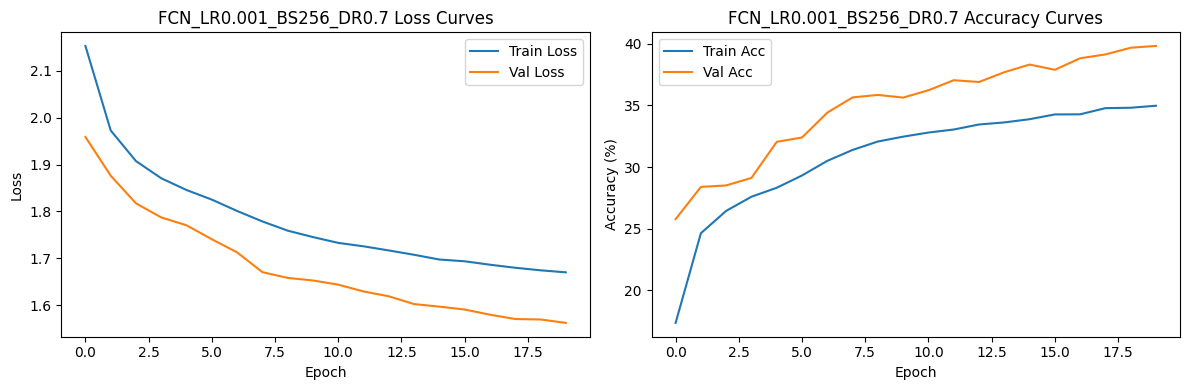


Testing: LR=0.0001, Batch Size=64, Dropout=0.3
Epoch 1/20, Train Loss: 2.0595, Val Loss: 1.8003, Val Acc: 30.75%
Epoch 2/20, Train Loss: 1.7890, Val Loss: 1.6710, Val Acc: 36.21%
Epoch 3/20, Train Loss: 1.6875, Val Loss: 1.6087, Val Acc: 37.38%
Epoch 4/20, Train Loss: 1.6293, Val Loss: 1.5706, Val Acc: 38.13%
Epoch 5/20, Train Loss: 1.5865, Val Loss: 1.5253, Val Acc: 40.43%
Epoch 6/20, Train Loss: 1.5490, Val Loss: 1.4941, Val Acc: 41.30%
Epoch 7/20, Train Loss: 1.5152, Val Loss: 1.4685, Val Acc: 42.16%
Epoch 8/20, Train Loss: 1.4894, Val Loss: 1.4506, Val Acc: 42.37%
Epoch 9/20, Train Loss: 1.4656, Val Loss: 1.4357, Val Acc: 42.89%
Epoch 10/20, Train Loss: 1.4446, Val Loss: 1.4236, Val Acc: 43.15%
Epoch 11/20, Train Loss: 1.4236, Val Loss: 1.3966, Val Acc: 44.07%
Epoch 12/20, Train Loss: 1.3959, Val Loss: 1.3646, Val Acc: 44.76%
Epoch 13/20, Train Loss: 1.3603, Val Loss: 1.3310, Val Acc: 46.62%
Epoch 14/20, Train Loss: 1.3330, Val Loss: 1.3082, Val Acc: 47.12%
Epoch 15/20, Train Loss

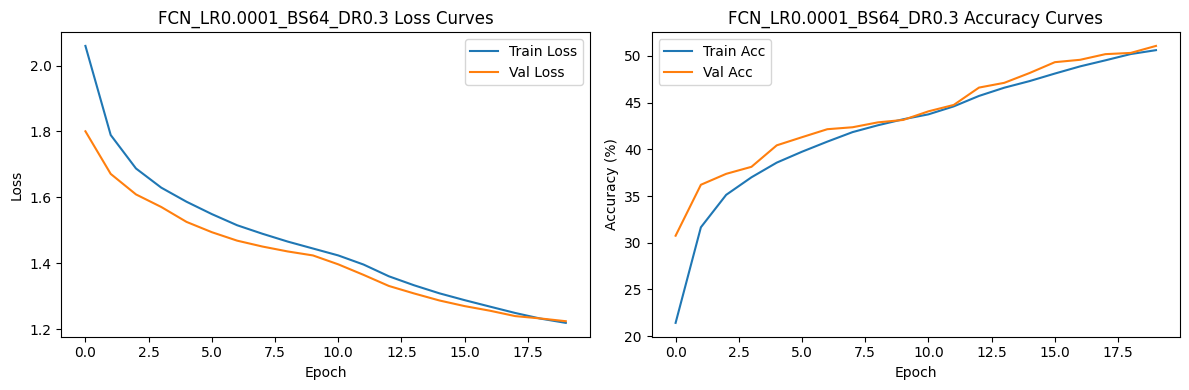


Testing: LR=0.0001, Batch Size=64, Dropout=0.5
Epoch 1/20, Train Loss: 2.1865, Val Loss: 1.9948, Val Acc: 25.80%
Epoch 2/20, Train Loss: 1.9540, Val Loss: 1.7944, Val Acc: 31.27%
Epoch 3/20, Train Loss: 1.8394, Val Loss: 1.7337, Val Acc: 33.73%
Epoch 4/20, Train Loss: 1.7814, Val Loss: 1.6787, Val Acc: 35.73%
Epoch 5/20, Train Loss: 1.7280, Val Loss: 1.6372, Val Acc: 36.41%
Epoch 6/20, Train Loss: 1.6929, Val Loss: 1.6128, Val Acc: 37.24%
Epoch 7/20, Train Loss: 1.6643, Val Loss: 1.5920, Val Acc: 37.92%
Epoch 8/20, Train Loss: 1.6414, Val Loss: 1.5691, Val Acc: 39.35%
Epoch 9/20, Train Loss: 1.6188, Val Loss: 1.5443, Val Acc: 40.41%
Epoch 10/20, Train Loss: 1.6017, Val Loss: 1.5264, Val Acc: 40.57%
Epoch 11/20, Train Loss: 1.5848, Val Loss: 1.5130, Val Acc: 40.80%
Epoch 12/20, Train Loss: 1.5680, Val Loss: 1.4912, Val Acc: 41.23%
Epoch 13/20, Train Loss: 1.5516, Val Loss: 1.4838, Val Acc: 41.80%
Epoch 14/20, Train Loss: 1.5388, Val Loss: 1.4679, Val Acc: 41.95%
Epoch 15/20, Train Loss

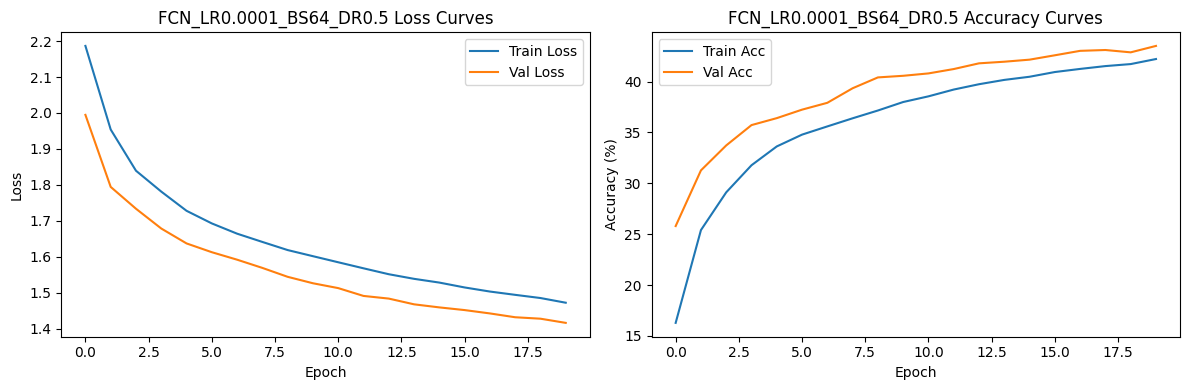


Testing: LR=0.0001, Batch Size=64, Dropout=0.7
Epoch 1/20, Train Loss: 2.2925, Val Loss: 2.1942, Val Acc: 14.39%
Epoch 2/20, Train Loss: 2.1775, Val Loss: 2.0941, Val Acc: 19.16%
Epoch 3/20, Train Loss: 2.0976, Val Loss: 2.0003, Val Acc: 25.44%
Epoch 4/20, Train Loss: 2.0194, Val Loss: 1.9136, Val Acc: 27.35%
Epoch 5/20, Train Loss: 1.9558, Val Loss: 1.8640, Val Acc: 28.12%
Epoch 6/20, Train Loss: 1.9080, Val Loss: 1.8179, Val Acc: 29.15%
Epoch 7/20, Train Loss: 1.8764, Val Loss: 1.7998, Val Acc: 29.33%
Epoch 8/20, Train Loss: 1.8567, Val Loss: 1.7863, Val Acc: 29.78%
Epoch 9/20, Train Loss: 1.8373, Val Loss: 1.7714, Val Acc: 30.22%
Epoch 10/20, Train Loss: 1.8253, Val Loss: 1.7628, Val Acc: 30.99%
Epoch 11/20, Train Loss: 1.8146, Val Loss: 1.7490, Val Acc: 31.79%
Epoch 12/20, Train Loss: 1.8035, Val Loss: 1.7429, Val Acc: 32.69%
Epoch 13/20, Train Loss: 1.7933, Val Loss: 1.7293, Val Acc: 32.94%
Epoch 14/20, Train Loss: 1.7822, Val Loss: 1.7208, Val Acc: 33.84%
Epoch 15/20, Train Loss

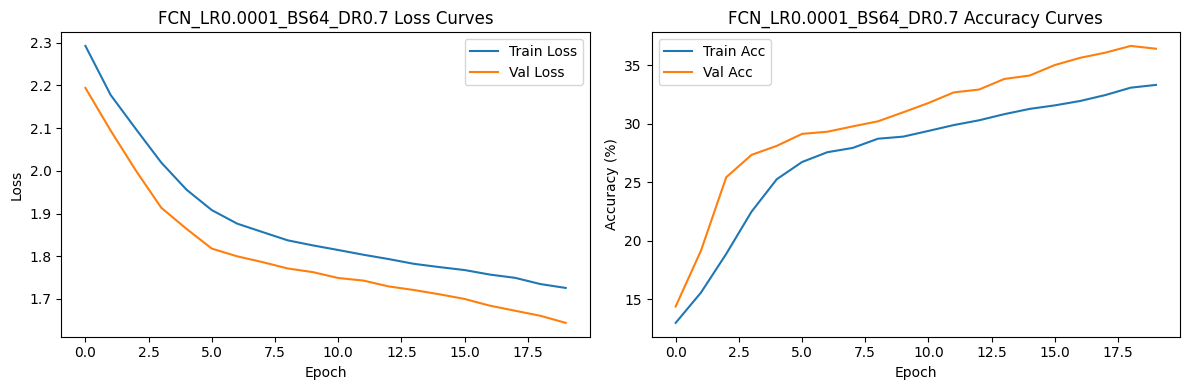


Testing: LR=0.0001, Batch Size=128, Dropout=0.3
Epoch 1/20, Train Loss: 2.1347, Val Loss: 1.8934, Val Acc: 28.45%
Epoch 2/20, Train Loss: 1.8539, Val Loss: 1.7348, Val Acc: 34.22%
Epoch 3/20, Train Loss: 1.7497, Val Loss: 1.6598, Val Acc: 36.29%
Epoch 4/20, Train Loss: 1.6831, Val Loss: 1.6123, Val Acc: 37.62%
Epoch 5/20, Train Loss: 1.6376, Val Loss: 1.5783, Val Acc: 38.27%
Epoch 6/20, Train Loss: 1.6005, Val Loss: 1.5517, Val Acc: 39.51%
Epoch 7/20, Train Loss: 1.5729, Val Loss: 1.5229, Val Acc: 40.84%
Epoch 8/20, Train Loss: 1.5444, Val Loss: 1.5006, Val Acc: 41.29%
Epoch 9/20, Train Loss: 1.5212, Val Loss: 1.4796, Val Acc: 41.88%
Epoch 10/20, Train Loss: 1.5022, Val Loss: 1.4651, Val Acc: 41.91%
Epoch 11/20, Train Loss: 1.4831, Val Loss: 1.4476, Val Acc: 42.57%
Epoch 12/20, Train Loss: 1.4685, Val Loss: 1.4372, Val Acc: 42.78%
Epoch 13/20, Train Loss: 1.4500, Val Loss: 1.4283, Val Acc: 43.44%
Epoch 14/20, Train Loss: 1.4315, Val Loss: 1.4068, Val Acc: 43.65%
Epoch 15/20, Train Los

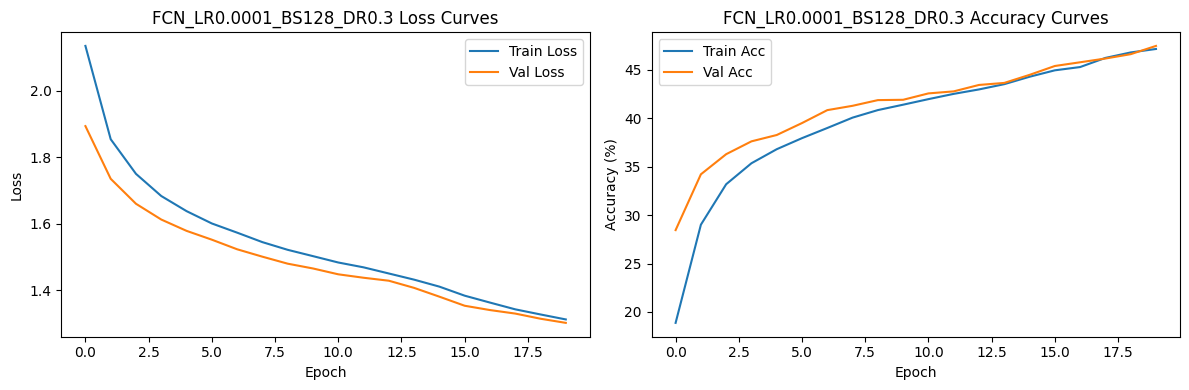


Testing: LR=0.0001, Batch Size=128, Dropout=0.5
Epoch 1/20, Train Loss: 2.2257, Val Loss: 2.0848, Val Acc: 19.64%
Epoch 2/20, Train Loss: 2.0442, Val Loss: 1.8944, Val Acc: 29.86%
Epoch 3/20, Train Loss: 1.9120, Val Loss: 1.7841, Val Acc: 32.03%
Epoch 4/20, Train Loss: 1.8300, Val Loss: 1.7283, Val Acc: 33.80%
Epoch 5/20, Train Loss: 1.7794, Val Loss: 1.6831, Val Acc: 35.13%
Epoch 6/20, Train Loss: 1.7391, Val Loss: 1.6544, Val Acc: 35.64%
Epoch 7/20, Train Loss: 1.7074, Val Loss: 1.6268, Val Acc: 36.66%
Epoch 8/20, Train Loss: 1.6827, Val Loss: 1.6093, Val Acc: 36.85%
Epoch 9/20, Train Loss: 1.6622, Val Loss: 1.5904, Val Acc: 38.03%
Epoch 10/20, Train Loss: 1.6460, Val Loss: 1.5732, Val Acc: 38.83%
Epoch 11/20, Train Loss: 1.6285, Val Loss: 1.5545, Val Acc: 39.52%
Epoch 12/20, Train Loss: 1.6090, Val Loss: 1.5358, Val Acc: 40.41%
Epoch 13/20, Train Loss: 1.5966, Val Loss: 1.5240, Val Acc: 40.73%
Epoch 14/20, Train Loss: 1.5810, Val Loss: 1.5077, Val Acc: 41.19%
Epoch 15/20, Train Los

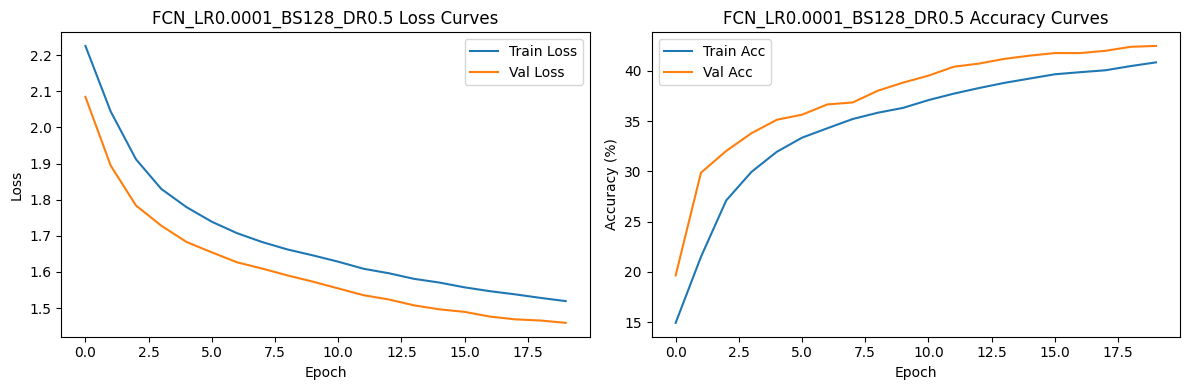


Testing: LR=0.0001, Batch Size=128, Dropout=0.7
Epoch 1/20, Train Loss: 2.3055, Val Loss: 2.2126, Val Acc: 14.51%
Epoch 2/20, Train Loss: 2.2084, Val Loss: 2.1368, Val Acc: 16.93%
Epoch 3/20, Train Loss: 2.1452, Val Loss: 2.0749, Val Acc: 19.91%
Epoch 4/20, Train Loss: 2.0874, Val Loss: 2.0010, Val Acc: 25.50%
Epoch 5/20, Train Loss: 2.0282, Val Loss: 1.9405, Val Acc: 26.84%
Epoch 6/20, Train Loss: 1.9801, Val Loss: 1.9021, Val Acc: 28.05%
Epoch 7/20, Train Loss: 1.9474, Val Loss: 1.8738, Val Acc: 28.77%
Epoch 8/20, Train Loss: 1.9183, Val Loss: 1.8459, Val Acc: 28.63%
Epoch 9/20, Train Loss: 1.8907, Val Loss: 1.8155, Val Acc: 29.10%
Epoch 10/20, Train Loss: 1.8667, Val Loss: 1.7944, Val Acc: 30.90%
Epoch 11/20, Train Loss: 1.8481, Val Loss: 1.7802, Val Acc: 31.30%
Epoch 12/20, Train Loss: 1.8367, Val Loss: 1.7755, Val Acc: 31.41%
Epoch 13/20, Train Loss: 1.8272, Val Loss: 1.7641, Val Acc: 31.83%
Epoch 14/20, Train Loss: 1.8142, Val Loss: 1.7535, Val Acc: 32.24%
Epoch 15/20, Train Los

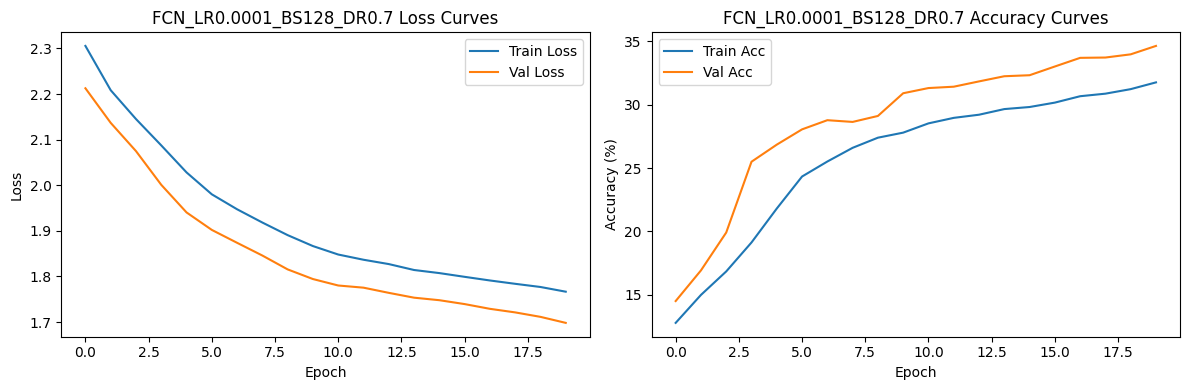


Testing: LR=0.0001, Batch Size=256, Dropout=0.3
Epoch 1/20, Train Loss: 2.1918, Val Loss: 1.9995, Val Acc: 25.23%
Epoch 2/20, Train Loss: 1.9320, Val Loss: 1.7968, Val Acc: 31.60%
Epoch 3/20, Train Loss: 1.8124, Val Loss: 1.7273, Val Acc: 34.43%
Epoch 4/20, Train Loss: 1.7486, Val Loss: 1.6699, Val Acc: 35.74%
Epoch 5/20, Train Loss: 1.6945, Val Loss: 1.6272, Val Acc: 36.62%
Epoch 6/20, Train Loss: 1.6561, Val Loss: 1.5986, Val Acc: 37.34%
Epoch 7/20, Train Loss: 1.6284, Val Loss: 1.5769, Val Acc: 38.61%
Epoch 8/20, Train Loss: 1.5999, Val Loss: 1.5555, Val Acc: 39.36%
Epoch 9/20, Train Loss: 1.5791, Val Loss: 1.5329, Val Acc: 40.23%
Epoch 10/20, Train Loss: 1.5570, Val Loss: 1.5182, Val Acc: 40.44%
Epoch 11/20, Train Loss: 1.5388, Val Loss: 1.5045, Val Acc: 41.00%
Epoch 12/20, Train Loss: 1.5238, Val Loss: 1.4901, Val Acc: 41.52%
Epoch 13/20, Train Loss: 1.5093, Val Loss: 1.4760, Val Acc: 42.02%
Epoch 14/20, Train Loss: 1.4966, Val Loss: 1.4691, Val Acc: 42.20%
Epoch 15/20, Train Los

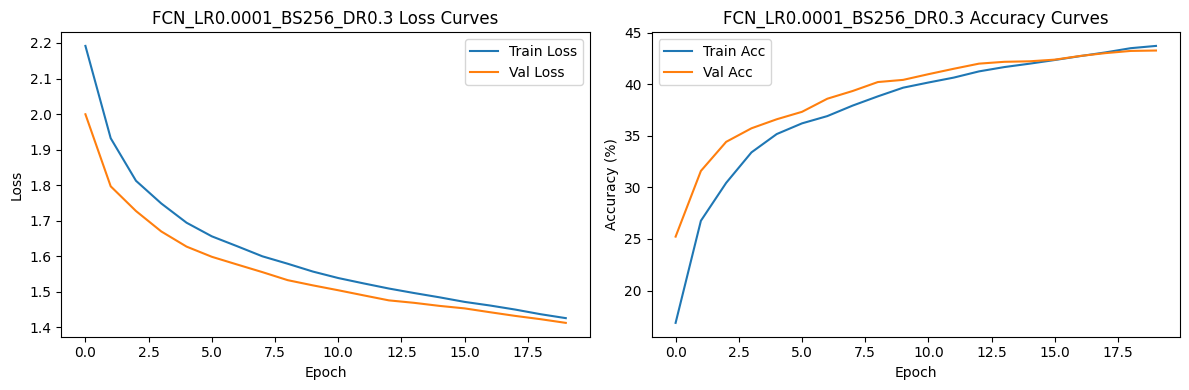


Testing: LR=0.0001, Batch Size=256, Dropout=0.5
Epoch 1/20, Train Loss: 2.2560, Val Loss: 2.1667, Val Acc: 17.22%
Epoch 2/20, Train Loss: 2.1183, Val Loss: 1.9799, Val Acc: 24.94%
Epoch 3/20, Train Loss: 1.9973, Val Loss: 1.8761, Val Acc: 29.62%
Epoch 4/20, Train Loss: 1.9147, Val Loss: 1.8001, Val Acc: 32.13%
Epoch 5/20, Train Loss: 1.8516, Val Loss: 1.7519, Val Acc: 33.30%
Epoch 6/20, Train Loss: 1.8110, Val Loss: 1.7201, Val Acc: 34.55%
Epoch 7/20, Train Loss: 1.7773, Val Loss: 1.6868, Val Acc: 35.13%
Epoch 8/20, Train Loss: 1.7468, Val Loss: 1.6575, Val Acc: 35.96%
Epoch 9/20, Train Loss: 1.7241, Val Loss: 1.6373, Val Acc: 36.23%
Epoch 10/20, Train Loss: 1.7020, Val Loss: 1.6236, Val Acc: 36.78%
Epoch 11/20, Train Loss: 1.6817, Val Loss: 1.6098, Val Acc: 37.02%
Epoch 12/20, Train Loss: 1.6664, Val Loss: 1.5989, Val Acc: 37.17%
Epoch 13/20, Train Loss: 1.6550, Val Loss: 1.5863, Val Acc: 37.85%
Epoch 14/20, Train Loss: 1.6411, Val Loss: 1.5765, Val Acc: 38.20%
Epoch 15/20, Train Los

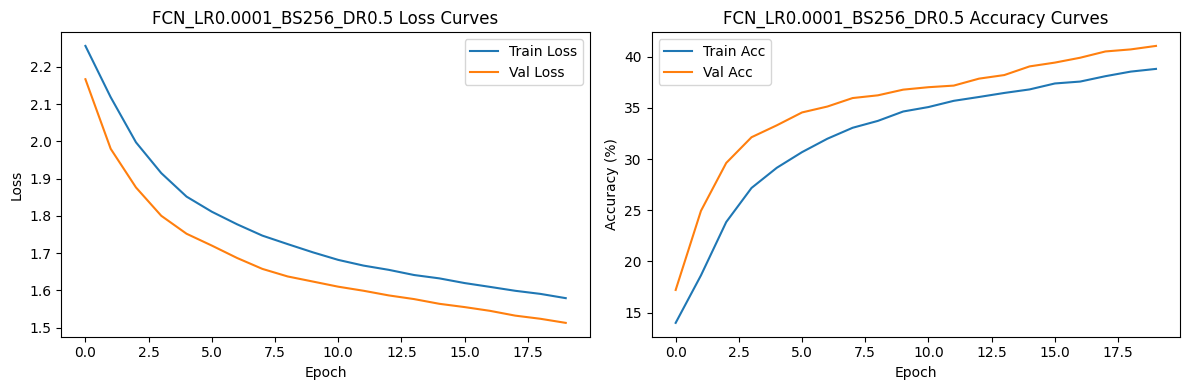


Testing: LR=0.0001, Batch Size=256, Dropout=0.7
Epoch 1/20, Train Loss: 2.3487, Val Loss: 2.2361, Val Acc: 14.36%
Epoch 2/20, Train Loss: 2.2467, Val Loss: 2.1971, Val Acc: 15.64%
Epoch 3/20, Train Loss: 2.2034, Val Loss: 2.1441, Val Acc: 17.52%
Epoch 4/20, Train Loss: 2.1519, Val Loss: 2.0849, Val Acc: 19.29%
Epoch 5/20, Train Loss: 2.1112, Val Loss: 2.0335, Val Acc: 23.10%
Epoch 6/20, Train Loss: 2.0641, Val Loss: 1.9769, Val Acc: 25.83%
Epoch 7/20, Train Loss: 2.0194, Val Loss: 1.9321, Val Acc: 27.38%
Epoch 8/20, Train Loss: 1.9816, Val Loss: 1.8972, Val Acc: 28.00%
Epoch 9/20, Train Loss: 1.9508, Val Loss: 1.8671, Val Acc: 28.40%
Epoch 10/20, Train Loss: 1.9236, Val Loss: 1.8391, Val Acc: 28.61%
Epoch 11/20, Train Loss: 1.8983, Val Loss: 1.8207, Val Acc: 28.77%
Epoch 12/20, Train Loss: 1.8778, Val Loss: 1.8044, Val Acc: 29.91%
Epoch 13/20, Train Loss: 1.8630, Val Loss: 1.7942, Val Acc: 29.35%
Epoch 14/20, Train Loss: 1.8533, Val Loss: 1.7863, Val Acc: 30.30%
Epoch 15/20, Train Los

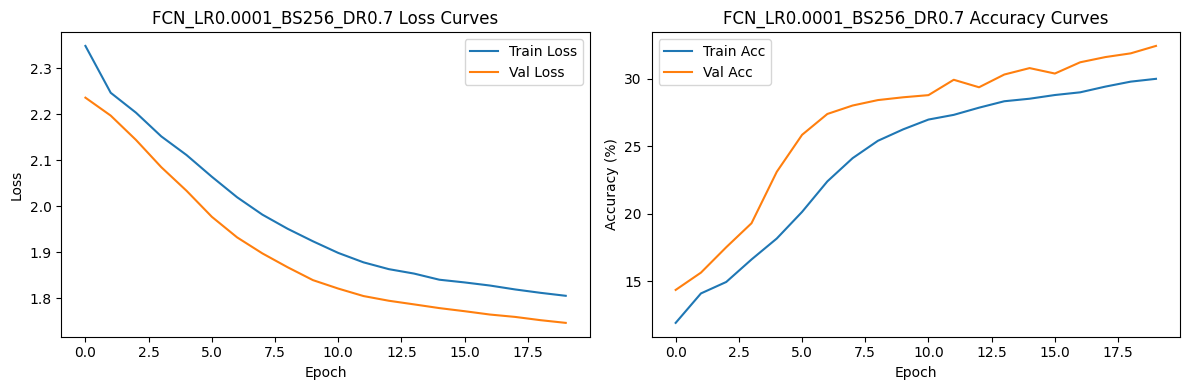


Best FCN Validation Accuracy: 51.08%
Best Parameters: {'lr': 0.0001, 'batch_size': 64, 'dropout': 0.3}
Baseline FCN Accuracy: 45.43%
Best FCN Accuracy: 51.08% (Improvement: 5.65%)

Training CNN...
Epoch 1/20, Train Loss: 1.7198, Val Loss: 1.4837, Val Acc: 41.89%
Epoch 2/20, Train Loss: 1.4539, Val Loss: 1.3569, Val Acc: 48.46%
Epoch 3/20, Train Loss: 1.3392, Val Loss: 1.2907, Val Acc: 50.75%
Epoch 4/20, Train Loss: 1.2848, Val Loss: 1.2611, Val Acc: 52.01%
Epoch 5/20, Train Loss: 1.2525, Val Loss: 1.2493, Val Acc: 52.69%
Epoch 6/20, Train Loss: 1.2299, Val Loss: 1.2210, Val Acc: 53.26%
Epoch 7/20, Train Loss: 1.2079, Val Loss: 1.2180, Val Acc: 54.03%
Epoch 8/20, Train Loss: 1.1898, Val Loss: 1.2053, Val Acc: 54.03%
Epoch 9/20, Train Loss: 1.1714, Val Loss: 1.1977, Val Acc: 54.34%
Epoch 10/20, Train Loss: 1.1554, Val Loss: 1.2006, Val Acc: 54.34%
Epoch 11/20, Train Loss: 1.1385, Val Loss: 1.1966, Val Acc: 54.49%
Epoch 12/20, Train Loss: 1.1180, Val Loss: 1.2040, Val Acc: 54.48%
Epoch 1

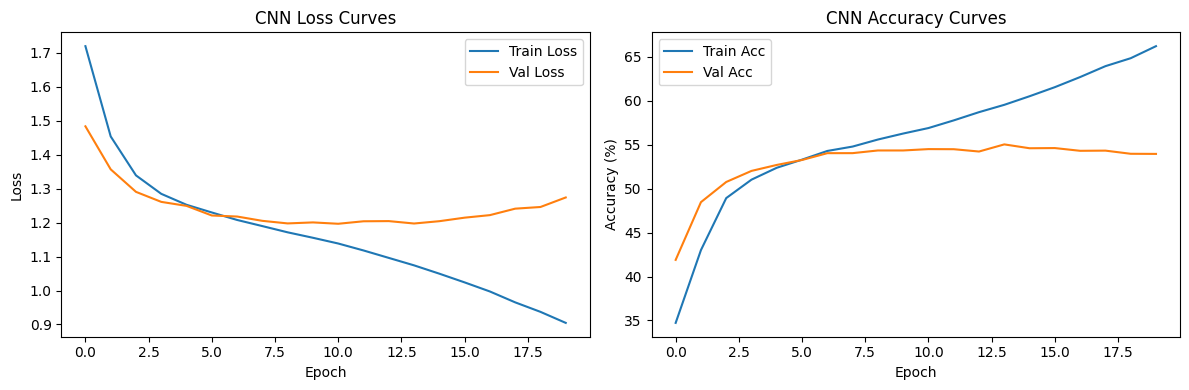

CNN Validation Accuracy: 55.03%
Baseline FCN Accuracy: 45.43%
CNN Accuracy: 55.03% (Improvement: 9.60%)

FCN Parameter Count: 297739
CNN Parameter Count: 2227019

Evaluating Baseline FCN...

Baseline_FCN Per-class F1 Scores:
8PSK: 0.3446
AM-DSB: 0.6072
AM-SSB: 0.6100
BPSK: 0.4064
CPFSK: 0.4001
GFSK: 0.6965
PAM4: 0.6055
QAM16: 0.1860
QAM64: 0.4694
QPSK: 0.0093
WBFM: 0.2943


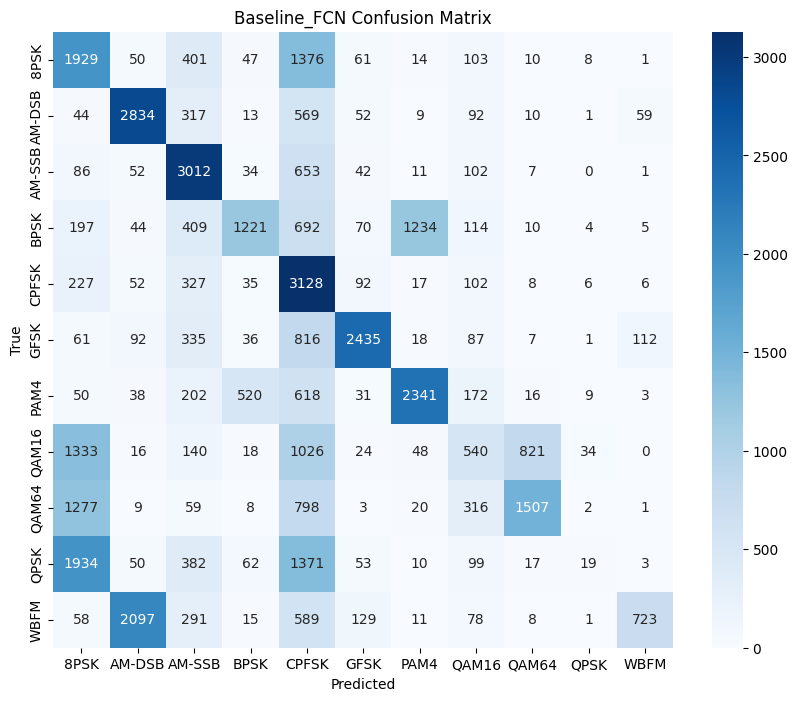


Evaluating Best FCN...

FCN Per-class F1 Scores:
8PSK: 0.3739
AM-DSB: 0.5773
AM-SSB: 0.6316
BPSK: 0.5214
CPFSK: 0.5123
GFSK: 0.6736
PAM4: 0.6391
QAM16: 0.4847
QAM64: 0.5508
QPSK: 0.0933
WBFM: 0.3477


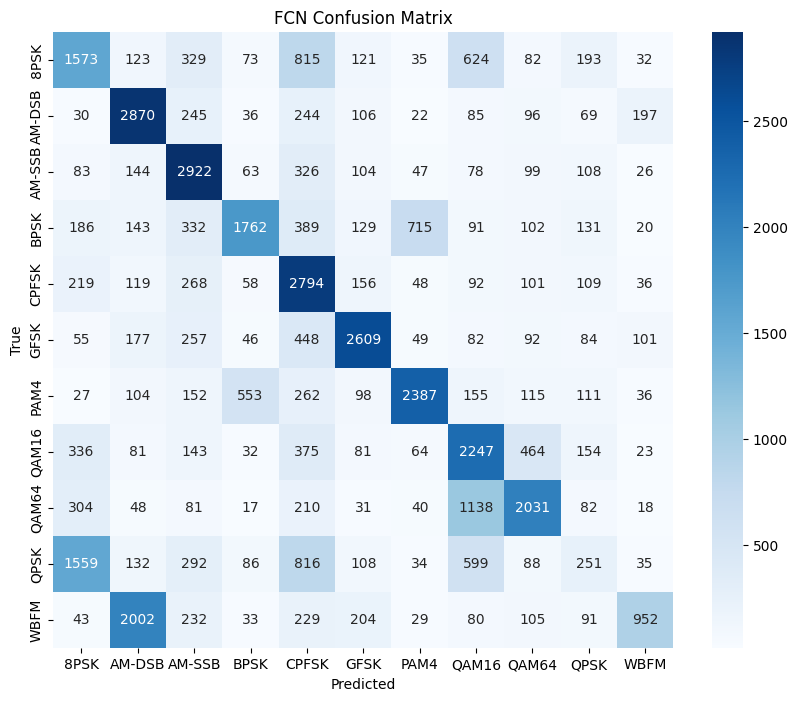


Evaluating CNN...

CNN Per-class F1 Scores:
8PSK: 0.5550
AM-DSB: 0.5468
AM-SSB: 0.4001
BPSK: 0.6649
CPFSK: 0.6901
GFSK: 0.6670
PAM4: 0.7342
QAM16: 0.2042
QAM64: 0.5200
QPSK: 0.5851
WBFM: 0.4224


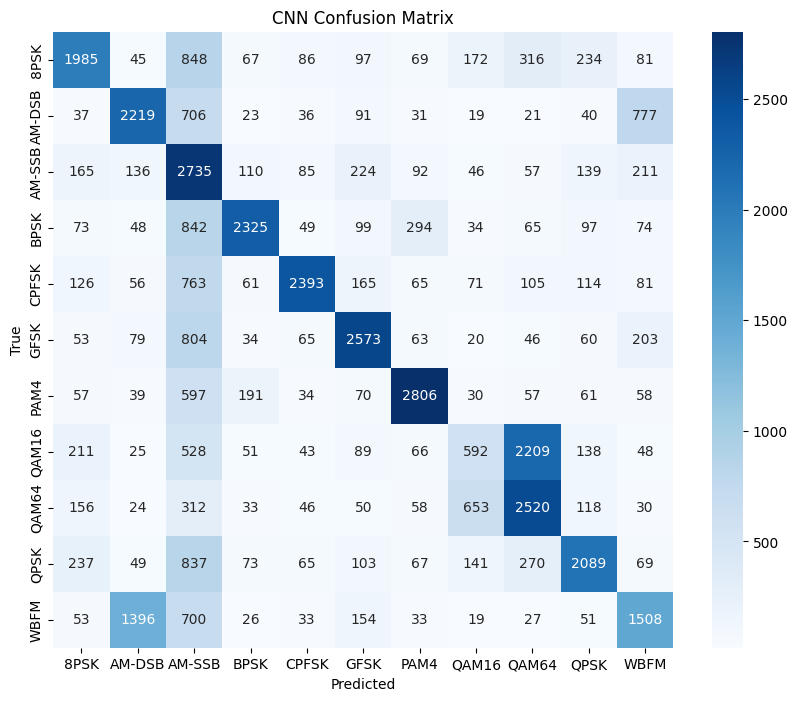


Testing Robustness with Noise Level: 0.05
Baseline_FCN Robustness Accuracy (Noise=0.05): 44.60%
FCN Robustness Accuracy (Noise=0.05): 50.13%
CNN Robustness Accuracy (Noise=0.05): 53.88%

Testing Robustness with Noise Level: 0.1
Baseline_FCN Robustness Accuracy (Noise=0.1): 44.16%
FCN Robustness Accuracy (Noise=0.1): 47.72%
CNN Robustness Accuracy (Noise=0.1): 53.82%

Testing Robustness with Noise Level: 0.2
Baseline_FCN Robustness Accuracy (Noise=0.2): 42.97%
FCN Robustness Accuracy (Noise=0.2): 43.21%
CNN Robustness Accuracy (Noise=0.2): 53.50%


In [6]:
# EE404 Project: Wireless Signal Classification Using Deep Learning
# Updated Notebook
# This notebook implements the full pipeline for classifying modulation types using the RadioML 2016.10A dataset.
# It addresses all project requirements, including Phase 1 (Discovery & Understanding), Phase 2 (Investigation & Extension),
# and the Bonus Phase (CNN). Improvements over the baseline include SNR-aware preprocessing, hyperparameter tuning,
# detailed evaluation, robustness testing, and a CNN implementation.

# ## 1. Setup and Imports
# Import necessary libraries for data handling, model building, training, and evaluation.
# Reference: *Understanding Deep Learning*, Ch. 2 (Data Preprocessing), Ch. 6 (Neural Networks), Ch. 8 (CNNs).

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pickle
import tarfile
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import itertools
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ## 2. Load RadioML 2016.10A Dataset
# Download and extract the dataset from Dropbox, then load it using pickle.
# The dataset contains I/Q samples for 11 modulation types under varying SNR conditions.
# Reference: *Understanding Deep Learning*, Ch. 2 (Data Formats).

dropbox_url = "https://www.dropbox.com/scl/fi/qbwwz3k9vl9unbugzv9bv/RML2016.10a.tar.bz2?rlkey=8jc298k3yhlf29ag2zk55qgv8&dl=1"
!wget -O RML2016.10a.tar.bz2 "$dropbox_url"

with tarfile.open("RML2016.10a.tar.bz2", "r:bz2") as tar:
    tar.extractall(path="radioml_2016_data")

!ls radioml_2016_data

pkl_path = "radioml_2016_data/RML2016.10a_dict.pkl"
with open(pkl_path, "rb") as f:
    data_dict = pickle.load(f, encoding="latin1")

print("Loaded keys (modulation, SNR):", list(data_dict.keys())[:3])
print("Shape of one entry:", data_dict[list(data_dict.keys())[0]].shape)

# ## 3. Preprocess Data
# Flatten I/Q samples for FCN, retain structure for CNN, and include normalized SNR as a feature for FCN (Phase 2B).
# Normalize I/Q data per sample to stabilize training.
# Reference: *Understanding Deep Learning*, Ch. 2 (Normalization).

X_fcn = []
Y = []
SNR = []

for (modulation, snr), samples in data_dict.items():
    for sample in samples:
        X_fcn.append(sample.reshape(-1))
        Y.append(modulation)
        SNR.append(snr)

X_fcn = np.array(X_fcn)
Y = np.array(Y)
SNR = np.array(SNR, dtype=np.float32)

# Normalize I/Q data and SNR
X_fcn = (X_fcn - X_fcn.mean(axis=1, keepdims=True)) / (X_fcn.std(axis=1, keepdims=True) + 1e-6)
SNR = (SNR - SNR.mean()) / (SNR.std() + 1e-6)
X_fcn = np.concatenate([X_fcn, SNR[:, np.newaxis]], axis=1)

X_cnn = []
for (modulation, snr), samples in data_dict.items():
    for sample in samples:
        X_cnn.append(sample)

X_cnn = np.array(X_cnn)
for i in range(X_cnn.shape[0]):
    X_cnn[i] = (X_cnn[i] - X_cnn[i].mean()) / (X_cnn[i].std() + 1e-6)

print("FCN Input shape:", X_fcn.shape)
print("CNN Input shape:", X_cnn.shape)
print("Label shape:", Y.shape)
print("Unique modulations:", np.unique(Y))

# Encode labels
le = LabelEncoder()
Y_encoded = le.fit_transform(Y)

# ## 4. Split Data
# Split into 60% train, 20% validation, 20% test with stratification to preserve label distribution.
# Reference: *Understanding Deep Learning*, Ch. 3 (Train/Val/Test Splits).

X_fcn_train, X_fcn_temp, y_train, y_temp = train_test_split(
    X_fcn, Y_encoded, test_size=0.4, random_state=42, stratify=Y_encoded
)
X_fcn_val, X_fcn_test, y_val, y_test = train_test_split(
    X_fcn_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

X_cnn_train, X_cnn_temp, _, _ = train_test_split(
    X_cnn, Y_encoded, test_size=0.4, random_state=42, stratify=Y_encoded
)
X_cnn_val, X_cnn_test, _, _ = train_test_split(
    X_cnn_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train set size (FCN):", X_fcn_train.shape[0])
print("Validation set size (FCN):", X_fcn_val.shape[0])
print("Test set size (FCN):", X_fcn_test.shape[0])
print("Classes:", list(le.classes_))

# ## 5. Create PyTorch Datasets and DataLoaders
# Wrap data into PyTorch Dataset and DataLoader for efficient batching and shuffling.
# Reference: *Understanding Deep Learning*, Ch. 6 (Neural Network Training).

class ModulationDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# FCN datasets
train_dataset_fcn = ModulationDataset(X_fcn_train, y_train)
val_dataset_fcn = ModulationDataset(X_fcn_val, y_val)
test_dataset_fcn = ModulationDataset(X_fcn_test, y_test)

# CNN datasets
train_dataset_cnn = ModulationDataset(X_cnn_train, y_train)
val_dataset_cnn = ModulationDataset(X_cnn_val, y_val)
test_dataset_cnn = ModulationDataset(X_cnn_test, y_test)

# ## 6. Visualize I/Q Samples
# Plot I/Q components for selected modulations to understand data patterns.
# Reference: *Understanding Deep Learning*, Ch. 2 (Data Visualization).

def plot_iq(mod_type, num_samples=1):
    mod_indices = np.where(Y == mod_type)[0]
    if len(mod_indices) == 0:
        print(f"No samples found for modulation: {mod_type}")
        return

    fig, axs = plt.subplots(num_samples, 1, figsize=(10, 3 * num_samples), sharex=True)
    axs = np.atleast_1d(axs)

    for i in range(num_samples):
        idx = random.choice(mod_indices)
        raw_sample = X_cnn[idx]
        I, Q = raw_sample[0], raw_sample[1]

        axs[i].plot(I, label='In-phase (I)')
        axs[i].plot(Q, label='Quadrature (Q)')
        axs[i].set_title(f'{mod_type} – Sample {i+1}')
        axs[i].legend()
        axs[i].set_xlabel("Time")
        axs[i].set_ylabel("Amplitude")

    plt.tight_layout()
    plt.savefig(f'iq_plot_{mod_type}.png')
    plt.show()

plot_iq('QPSK')
plot_iq('QAM16')
plot_iq('WBFM')

# ## 7. Define Models
# Define FCN and CNN models. The FCN includes SNR, while the CNN processes raw I/Q data.
# Reference: *Understanding Deep Learning*, Ch. 6 (FCNs), Ch. 8 (CNNs).
# Note: Network diagrams for FCN and CNN should be created using draw.io and included in the project report.
# - FCN: Input(257) → Linear(512) → ReLU → Dropout → Linear(256) → ReLU → Dropout → Linear(128) → ReLU → Dropout → Linear(11)
# - CNN: Input(2, 128) → Conv1D(64, k=3) → ReLU → MaxPool → Conv1D(128, k=3) → ReLU → MaxPool → Conv1D(256, k=3) → ReLU → MaxPool → Flatten → Linear(512) → ReLU → Dropout → Linear(11)

class ModulationNet(nn.Module):
    def __init__(self, input_size=257, hidden_sizes=[512, 256, 128], num_classes=11, dropout_rate=0.5):
        super(ModulationNet, self).__init__()
        layers = []
        prev_size = input_size
        for size in hidden_sizes:
            layers.extend([
                nn.Linear(prev_size, size),
                nn.ReLU(),
                nn.Dropout(dropout_rate)
            ])
            prev_size = size
        layers.append(nn.Linear(prev_size, num_classes))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

class ModulationCNN(nn.Module):
    def __init__(self, num_classes=11):
        super(ModulationCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv1d(in_channels=2, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 16, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# ## 8. Training Function
# Train the model, track loss and accuracy, and plot learning curves.
# Reference: *Understanding Deep Learning*, Ch. 6 (Training Neural Networks).

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device, model_name):
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        train_losses.append(running_loss / len(train_loader))
        train_accs.append(100 * correct / total)

        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        val_losses.append(val_loss / len(val_loader))
        val_accs.append(100 * correct / total)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accs[-1]:.2f}%")

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.title(f'{model_name} Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train Acc')
    plt.plot(val_accs, label='Val Acc')
    plt.title(f'{model_name} Accuracy Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{model_name.lower()}_curves.png')
    plt.show()

    return max(val_accs), train_losses, val_losses, train_accs, val_accs

# ## 9. Evaluation Function
# Compute per-class F1 scores and confusion matrix (Phase 2C).
# Reference: *Understanding Deep Learning*, Ch. 3 (Evaluation Metrics).

def evaluate_model_detailed(model, test_loader, device, class_names, model_name):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    f1_scores = f1_score(y_true, y_pred, average=None)
    print(f"\n{model_name} Per-class F1 Scores:")
    for cls, f1 in zip(class_names, f1_scores):
        print(f"{cls}: {f1:.4f}")

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(f'{model_name.lower()}_confusion_matrix.png')
    plt.show()

    return f1_scores, cm

# ## 10. Robustness Testing
# Evaluate model performance under Gaussian noise (Phase 2D).
# Reference: *Understanding Deep Learning*, Ch. 3 (Model Robustness).

def test_robustness(model, test_loader, device, noise_factor=0.1, model_name="Model"):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs + torch.randn_like(inputs) * noise_factor
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = 100 * correct / total
    print(f"{model_name} Robustness Accuracy (Noise={noise_factor}): {acc:.2f}%")
    return acc

# ## 11. Baseline Model Training
# Train a baseline FCN model with fixed hyperparameters to establish a reference accuracy (Phase 1).
# Hyperparameters: learning rate=0.001, batch size=128, dropout=0.5, weight decay=0.0001.

baseline_loader_train = DataLoader(train_dataset_fcn, batch_size=128, shuffle=True)
baseline_loader_val = DataLoader(val_dataset_fcn, batch_size=128, shuffle=False)
baseline_loader_test = DataLoader(test_dataset_fcn, batch_size=128, shuffle=False)

baseline_model = ModulationNet(input_size=257, dropout_rate=0.5).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(baseline_model.parameters(), lr=0.001, weight_decay=0.0001)

print("\nTraining Baseline FCN...")
baseline_val_acc, _, _, _, _ = train_model(baseline_model, baseline_loader_train, baseline_loader_val, criterion, optimizer, num_epochs=20, device=device, model_name="Baseline_FCN")
print(f"Baseline FCN Validation Accuracy: {baseline_val_acc:.2f}%")

# Save baseline model
torch.save(baseline_model.state_dict(), 'baseline_fcn.pth')

# ## 12. Hyperparameter Tuning for FCN
# Perform grid search over learning rate, batch size, and dropout rate (Phase 2A).
# Reference: *Understanding Deep Learning*, Ch. 6 (Hyperparameter Tuning).

learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [64, 128, 256]
dropout_rates = [0.3, 0.5, 0.7]

best_val_acc = 0
best_params = None
best_model_fcn = None

for lr, bs, dr in itertools.product(learning_rates, batch_sizes, dropout_rates):
    print(f"\nTesting: LR={lr}, Batch Size={bs}, Dropout={dr}")
    train_loader = DataLoader(train_dataset_fcn, batch_size=bs, shuffle=True)
    val_loader = DataLoader(val_dataset_fcn, batch_size=bs, shuffle=False)

    model = ModulationNet(input_size=257, dropout_rate=dr).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=0.0001)

    val_acc, _, _, _, _ = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20, device=device, model_name=f"FCN_LR{lr}_BS{bs}_DR{dr}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_params = {'lr': lr, 'batch_size': bs, 'dropout': dr}
        best_model_fcn = model

print(f"\nBest FCN Validation Accuracy: {best_val_acc:.2f}%")
print(f"Best Parameters: {best_params}")

# Save best FCN model
torch.save(best_model_fcn.state_dict(), 'best_fcn.pth')

# Compare to baseline
print(f"Baseline FCN Accuracy: {baseline_val_acc:.2f}%")
print(f"Best FCN Accuracy: {best_val_acc:.2f}% (Improvement: {best_val_acc - baseline_val_acc:.2f}%)")

# ## 13. Train CNN
# Train the CNN using the best FCN parameters, with 20 epochs for fair comparison (Bonus Phase).
# Reference: *Understanding Deep Learning*, Ch. 8 (Convolutional Neural Networks).

train_loader_cnn = DataLoader(train_dataset_cnn, batch_size=best_params['batch_size'], shuffle=True)
val_loader_cnn = DataLoader(val_dataset_cnn, batch_size=best_params['batch_size'], shuffle=False)
test_loader_cnn = DataLoader(test_dataset_cnn, batch_size=best_params['batch_size'], shuffle=False)

model_cnn = ModulationCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=best_params['lr'], weight_decay=0.0001)

print("\nTraining CNN...")
val_acc_cnn, _, _, _, _ = train_model(model_cnn, train_loader_cnn, val_loader_cnn, criterion, optimizer, num_epochs=20, device=device, model_name="CNN")
print(f"CNN Validation Accuracy: {val_acc_cnn:.2f}%")

# Save CNN model
torch.save(model_cnn.state_dict(), 'best_cnn.pth')

# Compare to baseline
print(f"Baseline FCN Accuracy: {baseline_val_acc:.2f}%")
print(f"CNN Accuracy: {val_acc_cnn:.2f}% (Improvement: {val_acc_cnn - baseline_val_acc:.2f}%)")

# ## 14. Compare Model Complexity
# Compute and compare the number of trainable parameters for FCN and CNN (Bonus Phase).
# Reference: *Understanding Deep Learning*, Ch. 6 (Model Complexity).

param_count_fcn = sum(p.numel() for p in best_model_fcn.parameters() if p.requires_grad)
param_count_cnn = sum(p.numel() for p in model_cnn.parameters() if p.requires_grad)
print(f"\nFCN Parameter Count: {param_count_fcn}")
print(f"CNN Parameter Count: {param_count_cnn}")

# ## 15. Detailed Evaluation
# Evaluate both models on the test set with per-class F1 scores and confusion matrices (Phase 2C).

print("\nEvaluating Baseline FCN...")
baseline_f1, baseline_cm = evaluate_model_detailed(baseline_model, baseline_loader_test, device, le.classes_, "Baseline_FCN")

print("\nEvaluating Best FCN...")
fcn_f1, fcn_cm = evaluate_model_detailed(best_model_fcn, test_loader_fcn, device, le.classes_, "FCN")

print("\nEvaluating CNN...")
cnn_f1, cnn_cm = evaluate_model_detailed(model_cnn, test_loader_cnn, device, le.classes_, "CNN")

# ## 16. Robustness Testing
# Test both models under Gaussian noise with multiple noise levels (Phase 2D).

noise_levels = [0.05, 0.1, 0.2]
for noise in noise_levels:
    print(f"\nTesting Robustness with Noise Level: {noise}")
    baseline_robust_acc = test_robustness(baseline_model, baseline_loader_test, device, noise_factor=noise, model_name="Baseline_FCN")
    fcn_robust_acc = test_robustness(best_model_fcn, test_loader_fcn, device, noise_factor=noise, model_name="FCN")
    cnn_robust_acc = test_robustness(model_cnn, test_loader_cnn, device, noise_factor=noise, model_name="CNN")

# ## 17. Summary for Project Report
# Summarize key results for the project report.
# - **Baseline FCN Accuracy**: {baseline_val_acc:.2f}%
# - **Best FCN Accuracy**: {best_val_acc:.2f}% (Improvement: {best_val_acc - baseline_val_acc:.2f}%)
# - **CNN Accuracy**: {val_acc_cnn:.2f}% (Improvement: {val_acc_cnn - baseline_val_acc:.2f}%)
# - **Best Parameters**: {best_params}
# - **Parameter Counts**: FCN: {param_count_fcn}, CNN: {param_count_cnn}
# - **F1 Scores**: See per-class results above.
# - **Robustness**: See noise test results above.
# - **Figures**: I/Q plots (iq_plot_*.png), learning curves (*_curves.png), confusion matrices (*_confusion_matrix.png).
# - **Network Diagrams**: Create using draw.io and include in the report.
# - **Challenges**: WBFM misclassification (see confusion matrices), computational cost of CNN.
# - **Future Work**: Explore SNR filtering, additional CNN architectures, or transfer learning.

# ## 18. Instructions for Project Report
# 1. **Introduction**: Describe the task (modulation classification) and dataset (RadioML 2016.10A).
# 2. **Methodology**: Explain pipeline, SNR integration, hyperparameter tuning, CNN architecture.
# 3. **Results**: Include accuracies, F1 scores, confusion matrices, robustness results, and parameter counts.
# 4. **Discussion**: Analyze improvements, challenges, and future work.
# 5. **Contributions**: List group member roles (e.g., coding, tuning, report writing).
# 6. **Figures**: Use saved PNGs and network diagrams.
# Submit as a PDF alongside this notebook.

# ## 19. Instructions for Network Diagrams
# Create diagrams using draw.io:
# - **FCN**: Show input(257) → 512 → 256 → 128 → 11 with ReLU and Dropout.
# - **CNN**: Show input(2, 128) → Conv1D(64) → Pool → Conv1D(128) → Pool → Conv1D(256) → Pool → Flatten → 512 → 11.
# Include in the project report and oral demo slides.